In [ ]:
!sudo update-alternatives --remove-all python3

In [ ]:
!sudo add-apt-repository ppa:deadsnakes/ppa -y
!sudo apt-get update -y

In [ ]:
!sudo apt-get install python3.12 python3.12-dev python3.12-distutils -y

In [ ]:
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.12 100

In [ ]:
!sudo apt-get install python3.12 python3.12-dev python3.12-distutils -y

In [ ]:
!python3 -m ensurepip --upgrade
!python3 -m pip install --upgrade pip setuptools wheel

In [ ]:
!python3 --version
!pip --version

In [ ]:
!pip install diffusers
!pip install datasets==4.0.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.8/494.8 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 16.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.7.0
    Uninstalling fsspec-2025.7.0:
      Successfully uninstalled fsspec-2025.7.0
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12

In [ ]:
!pip install googletrans==4.0.0-rc1
!pip install requests==2.28.1
!pip install gspread
!pip install google-oauth2-tool
!pip install google-auth
!pip install geopy

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.2 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=b4709dd5557d8b2052f6d1e4dd27dc72377e886ad78a478c2b9be32ebe1212ce
  Stored in directory: /root/.cache/pip/wheels/39/17/6f/66a045ea3d168826074691b4b787b8f324d3f646d755443fda
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.1.0
    Uninstalling hyperfram

In [ ]:
import torch
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torch.optim import AdamW
from diffusers import UNet2DModel, DDPMScheduler, DDPMPipeline
from diffusers.optimization import get_cosine_schedule_with_warmup
from datasets import load_dataset
from accelerate import Accelerator
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import random
import timeit
#from typing import ParamSpecArgs
###from selenium.webdriver.support import expected_conditions as EC
import time
import requests
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import drive
import gspread
from google.oauth2.service_account import Credentials
from geopy.geocoders import Nominatim
import csv
import string
import math
import pandas as pd
import os
#import undetected_chromedriver as uc
try:
  drive.flush_and_unmount()
  print("Drive unmounted successfully.")
except:
  print("Drive was not mounted.")
drive.mount('/content/drive')

Drive not mounted, so nothing to flush and unmount.
Drive unmounted successfully.
Mounted at /content/drive


In [ ]:
RANDOM_SEED = 42
IMG_SIZE = 128
BATCH_SIZE = 16
LEARNING_RATE = 3e-4
NUM_EPOCHS = 700
NUM_GENERATE_IMAGES = 9
NUM_TIMESTEPS = 1000#1000
MIXED_PRECISION = "fp16"
GRADIENT_ACCUMULATION_STEPS = 1

random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed_all(RANDOM_SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:

dataset = load_dataset("/content/drive/MyDrive/s/images", split="train")
#!ls -l "/content/drive/MyDrive/s/images"



#!pip show datasets

Resolving data files:   0%|          | 0/52 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

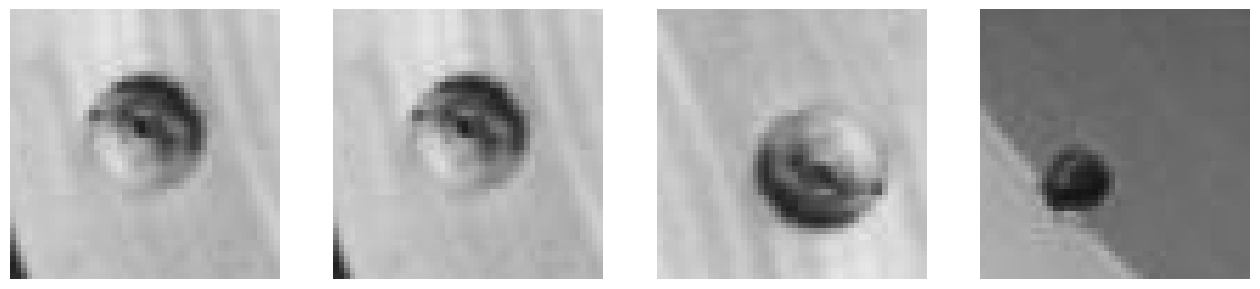

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
for i, image in enumerate(dataset[:4]["image"]):
    axs[i].imshow(image)
    axs[i].set_axis_off()
fig.show()

In [ ]:
preprocess = transforms.Compose(
[
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

In [ ]:
def transform(examples):
    images = [preprocess(image.convert("RGB")) for image in examples["image"]]
    return {"images": images}

dataset.set_transform(transform)

In [ ]:
train_dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=False)

In [ ]:
model = UNet2DModel(
    sample_size=IMG_SIZE,
    in_channels=3,
    out_channels=3,
    layers_per_block=2,
    block_out_channels=(128, 128, 256, 256, 512, 512),
    down_block_types=(
        "DownBlock2D",
        "DownBlock2D",
        "DownBlock2D",
        "DownBlock2D",
        "AttnDownBlock2D",
        "DownBlock2D"
    ),
    up_block_types=(
        "UpBlock2D",
        "AttnUpBlock2D",
        "UpBlock2D",
        "UpBlock2D",
        "UpBlock2D",
        "UpBlock2D"
    )
)
model = model.to(device)

In [ ]:
sample_image = dataset[0]["images"].unsqueeze(0).to(device)
print("Input shape", sample_image.shape)
print("Output shape", model(sample_image, timestep=0).sample.shape)

Input shape torch.Size([1, 3, 128, 128])
Output shape torch.Size([1, 3, 128, 128])


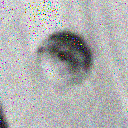

In [ ]:
noise_scheduler = DDPMScheduler(num_train_timesteps=NUM_TIMESTEPS)
noise = torch.randn(sample_image.shape).to(device)
timesteps = torch.LongTensor([50]).to(device)
noisy_image = noise_scheduler.add_noise(sample_image, noise, timesteps)

Image.fromarray(((noisy_image.permute(0, 2, 3, 1) + 1.0) * 127.5).type(torch.uint8).cpu().numpy()[0])

In [ ]:
noise_pred = model(noisy_image, timesteps).sample
loss = F.mse_loss(noise_pred, noise)
print(loss)

tensor(1.2201, device='cuda:0', grad_fn=<MseLossBackward0>)


In [ ]:
def sample_image_generation(model, noise_scheduler, num_generate_images, random_seed, num_timesteps):
    pipeline = DDPMPipeline(unet=accelerator.unwrap_model(model), scheduler=noise_scheduler)

    images = pipeline(
        batch_size=num_generate_images,
        generator=torch.manual_seed(random_seed),
        num_inference_steps=num_timesteps
    ).images

    fig = plt.figure()
    for i in range(1, num_generate_images+1):
        fig.add_subplot(3, 3, i)
        plt.imshow(images[i-1])
    plt.show()

  0%|          | 1/700 [00:25<4:59:22, 25.70s/it]

------------------------------
Train Loss EPOCH: 1: 1.2033
Train Learning Rate EPOCH: 1: 2.4e-06
------------------------------


  0%|          | 2/700 [00:28<2:19:38, 12.00s/it]

------------------------------
Train Loss EPOCH: 2: 1.1728
Train Learning Rate EPOCH: 2: 4.8e-06
------------------------------


  0%|          | 3/700 [00:30<1:28:41,  7.63s/it]

------------------------------
Train Loss EPOCH: 3: 1.1054
Train Learning Rate EPOCH: 3: 7.2e-06
------------------------------


  1%|          | 4/700 [00:32<1:04:44,  5.58s/it]

------------------------------
Train Loss EPOCH: 4: 1.0160
Train Learning Rate EPOCH: 4: 9.6e-06
------------------------------


  1%|          | 5/700 [00:35<52:46,  4.56s/it]  

------------------------------
Train Loss EPOCH: 5: 0.9179
Train Learning Rate EPOCH: 5: 1.1999999999999999e-05
------------------------------


  1%|          | 6/700 [00:38<44:30,  3.85s/it]

------------------------------
Train Loss EPOCH: 6: 0.8155
Train Learning Rate EPOCH: 6: 1.44e-05
------------------------------


  1%|          | 7/700 [00:40<39:10,  3.39s/it]

------------------------------
Train Loss EPOCH: 7: 0.6872
Train Learning Rate EPOCH: 7: 1.68e-05
------------------------------


  1%|          | 8/700 [00:43<35:43,  3.10s/it]

------------------------------
Train Loss EPOCH: 8: 0.5615
Train Learning Rate EPOCH: 8: 1.92e-05
------------------------------


  1%|▏         | 9/700 [00:45<33:19,  2.89s/it]

------------------------------
Train Loss EPOCH: 9: 0.4461
Train Learning Rate EPOCH: 9: 2.1599999999999996e-05
------------------------------


  1%|▏         | 10/700 [00:48<31:50,  2.77s/it]

------------------------------
Train Loss EPOCH: 10: 0.3504
Train Learning Rate EPOCH: 10: 2.3999999999999997e-05
------------------------------


  2%|▏         | 11/700 [00:50<30:55,  2.69s/it]

------------------------------
Train Loss EPOCH: 11: 0.2591
Train Learning Rate EPOCH: 11: 2.6399999999999995e-05
------------------------------


  2%|▏         | 12/700 [00:53<30:09,  2.63s/it]

------------------------------
Train Loss EPOCH: 12: 0.1807
Train Learning Rate EPOCH: 12: 2.88e-05
------------------------------


  2%|▏         | 13/700 [00:55<29:36,  2.59s/it]

------------------------------
Train Loss EPOCH: 13: 0.1479
Train Learning Rate EPOCH: 13: 3.119999999999999e-05
------------------------------


  2%|▏         | 14/700 [00:58<29:12,  2.55s/it]

------------------------------
Train Loss EPOCH: 14: 0.0871
Train Learning Rate EPOCH: 14: 3.36e-05
------------------------------


  2%|▏         | 15/700 [01:00<29:02,  2.54s/it]

------------------------------
Train Loss EPOCH: 15: 0.0689
Train Learning Rate EPOCH: 15: 3.5999999999999994e-05
------------------------------


  2%|▏         | 16/700 [01:03<29:05,  2.55s/it]

------------------------------
Train Loss EPOCH: 16: 0.0970
Train Learning Rate EPOCH: 16: 3.84e-05
------------------------------


  2%|▏         | 17/700 [01:05<29:03,  2.55s/it]

------------------------------
Train Loss EPOCH: 17: 0.0684
Train Learning Rate EPOCH: 17: 4.08e-05
------------------------------


  3%|▎         | 18/700 [01:08<28:55,  2.55s/it]

------------------------------
Train Loss EPOCH: 18: 0.0834
Train Learning Rate EPOCH: 18: 4.319999999999999e-05
------------------------------


  3%|▎         | 19/700 [01:10<28:54,  2.55s/it]

------------------------------
Train Loss EPOCH: 19: 0.0644
Train Learning Rate EPOCH: 19: 4.56e-05
------------------------------


  3%|▎         | 20/700 [01:13<28:53,  2.55s/it]

------------------------------
Train Loss EPOCH: 20: 0.0504
Train Learning Rate EPOCH: 20: 4.7999999999999994e-05
------------------------------


  3%|▎         | 21/700 [01:15<29:02,  2.57s/it]

------------------------------
Train Loss EPOCH: 21: 0.0720
Train Learning Rate EPOCH: 21: 5.04e-05
------------------------------


  3%|▎         | 22/700 [01:18<29:11,  2.58s/it]

------------------------------
Train Loss EPOCH: 22: 0.0809
Train Learning Rate EPOCH: 22: 5.279999999999999e-05
------------------------------


  3%|▎         | 23/700 [01:21<29:09,  2.58s/it]

------------------------------
Train Loss EPOCH: 23: 0.0425
Train Learning Rate EPOCH: 23: 5.519999999999999e-05
------------------------------


  3%|▎         | 24/700 [01:23<29:13,  2.59s/it]

------------------------------
Train Loss EPOCH: 24: 0.0500
Train Learning Rate EPOCH: 24: 5.76e-05
------------------------------


  4%|▎         | 25/700 [01:26<29:14,  2.60s/it]

------------------------------
Train Loss EPOCH: 25: 0.0445
Train Learning Rate EPOCH: 25: 5.9999999999999995e-05
------------------------------


  4%|▎         | 26/700 [01:28<29:20,  2.61s/it]

------------------------------
Train Loss EPOCH: 26: 0.0375
Train Learning Rate EPOCH: 26: 6.239999999999999e-05
------------------------------


  4%|▍         | 27/700 [01:31<29:16,  2.61s/it]

------------------------------
Train Loss EPOCH: 27: 0.0567
Train Learning Rate EPOCH: 27: 6.479999999999999e-05
------------------------------


  4%|▍         | 28/700 [01:34<29:09,  2.60s/it]

------------------------------
Train Loss EPOCH: 28: 0.0317
Train Learning Rate EPOCH: 28: 6.72e-05
------------------------------


  4%|▍         | 29/700 [01:36<29:00,  2.59s/it]

------------------------------
Train Loss EPOCH: 29: 0.0367
Train Learning Rate EPOCH: 29: 6.96e-05
------------------------------


  4%|▍         | 30/700 [01:39<28:49,  2.58s/it]

------------------------------
Train Loss EPOCH: 30: 0.0298
Train Learning Rate EPOCH: 30: 7.199999999999999e-05
------------------------------


  4%|▍         | 31/700 [01:41<28:50,  2.59s/it]

------------------------------
Train Loss EPOCH: 31: 0.0434
Train Learning Rate EPOCH: 31: 7.439999999999999e-05
------------------------------


  5%|▍         | 32/700 [01:44<28:46,  2.59s/it]

------------------------------
Train Loss EPOCH: 32: 0.0341
Train Learning Rate EPOCH: 32: 7.68e-05
------------------------------


  5%|▍         | 33/700 [01:47<28:36,  2.57s/it]

------------------------------
Train Loss EPOCH: 33: 0.0287
Train Learning Rate EPOCH: 33: 7.92e-05
------------------------------


  5%|▍         | 34/700 [01:49<28:23,  2.56s/it]

------------------------------
Train Loss EPOCH: 34: 0.0413
Train Learning Rate EPOCH: 34: 8.16e-05
------------------------------


  5%|▌         | 35/700 [01:52<28:16,  2.55s/it]

------------------------------
Train Loss EPOCH: 35: 0.0295
Train Learning Rate EPOCH: 35: 8.4e-05
------------------------------


  5%|▌         | 36/700 [01:54<28:18,  2.56s/it]

------------------------------
Train Loss EPOCH: 36: 0.0291
Train Learning Rate EPOCH: 36: 8.639999999999999e-05
------------------------------


  5%|▌         | 37/700 [01:57<28:11,  2.55s/it]

------------------------------
Train Loss EPOCH: 37: 0.0309
Train Learning Rate EPOCH: 37: 8.879999999999999e-05
------------------------------


  5%|▌         | 38/700 [01:59<28:03,  2.54s/it]

------------------------------
Train Loss EPOCH: 38: 0.0358
Train Learning Rate EPOCH: 38: 9.12e-05
------------------------------


  6%|▌         | 39/700 [02:02<27:56,  2.54s/it]

------------------------------
Train Loss EPOCH: 39: 0.0222
Train Learning Rate EPOCH: 39: 9.36e-05
------------------------------


  6%|▌         | 40/700 [02:04<27:49,  2.53s/it]

------------------------------
Train Loss EPOCH: 40: 0.0287
Train Learning Rate EPOCH: 40: 9.599999999999999e-05
------------------------------


  6%|▌         | 41/700 [02:07<27:47,  2.53s/it]

------------------------------
Train Loss EPOCH: 41: 0.0455
Train Learning Rate EPOCH: 41: 9.839999999999999e-05
------------------------------


  6%|▌         | 42/700 [02:09<27:49,  2.54s/it]

------------------------------
Train Loss EPOCH: 42: 0.0259
Train Learning Rate EPOCH: 42: 0.0001008
------------------------------


  6%|▌         | 43/700 [02:12<27:42,  2.53s/it]

------------------------------
Train Loss EPOCH: 43: 0.0210
Train Learning Rate EPOCH: 43: 0.00010319999999999999
------------------------------


  6%|▋         | 44/700 [02:14<27:32,  2.52s/it]

------------------------------
Train Loss EPOCH: 44: 0.0329
Train Learning Rate EPOCH: 44: 0.00010559999999999998
------------------------------


  6%|▋         | 45/700 [02:17<27:29,  2.52s/it]

------------------------------
Train Loss EPOCH: 45: 0.0303
Train Learning Rate EPOCH: 45: 0.00010799999999999998
------------------------------


  7%|▋         | 46/700 [02:19<27:32,  2.53s/it]

------------------------------
Train Loss EPOCH: 46: 0.0223
Train Learning Rate EPOCH: 46: 0.00011039999999999999
------------------------------


  7%|▋         | 47/700 [02:22<27:39,  2.54s/it]

------------------------------
Train Loss EPOCH: 47: 0.0249
Train Learning Rate EPOCH: 47: 0.00011279999999999999
------------------------------


  7%|▋         | 48/700 [02:25<27:35,  2.54s/it]

------------------------------
Train Loss EPOCH: 48: 0.0191
Train Learning Rate EPOCH: 48: 0.0001152
------------------------------


  7%|▋         | 49/700 [02:27<27:31,  2.54s/it]

------------------------------
Train Loss EPOCH: 49: 0.0214
Train Learning Rate EPOCH: 49: 0.0001176
------------------------------


  7%|▋         | 50/700 [02:30<27:27,  2.53s/it]

------------------------------
Train Loss EPOCH: 50: 0.0250
Train Learning Rate EPOCH: 50: 0.00011999999999999999
------------------------------


  7%|▋         | 51/700 [02:32<27:26,  2.54s/it]

------------------------------
Train Loss EPOCH: 51: 0.0184
Train Learning Rate EPOCH: 51: 0.0001224
------------------------------


  7%|▋         | 52/700 [02:35<27:34,  2.55s/it]

------------------------------
Train Loss EPOCH: 52: 0.0187
Train Learning Rate EPOCH: 52: 0.00012479999999999997
------------------------------


  8%|▊         | 53/700 [02:37<27:27,  2.55s/it]

------------------------------
Train Loss EPOCH: 53: 0.0216
Train Learning Rate EPOCH: 53: 0.00012719999999999997
------------------------------


  8%|▊         | 54/700 [02:40<27:20,  2.54s/it]

------------------------------
Train Loss EPOCH: 54: 0.0262
Train Learning Rate EPOCH: 54: 0.00012959999999999998
------------------------------


  8%|▊         | 55/700 [02:42<27:21,  2.55s/it]

------------------------------
Train Loss EPOCH: 55: 0.0173
Train Learning Rate EPOCH: 55: 0.00013199999999999998
------------------------------


  8%|▊         | 56/700 [02:45<27:23,  2.55s/it]

------------------------------
Train Loss EPOCH: 56: 0.0186
Train Learning Rate EPOCH: 56: 0.0001344
------------------------------


  8%|▊         | 57/700 [02:48<27:33,  2.57s/it]

------------------------------
Train Loss EPOCH: 57: 0.0212
Train Learning Rate EPOCH: 57: 0.0001368
------------------------------


  8%|▊         | 58/700 [02:50<27:25,  2.56s/it]

------------------------------
Train Loss EPOCH: 58: 0.0194
Train Learning Rate EPOCH: 58: 0.0001392
------------------------------


  8%|▊         | 59/700 [02:53<27:21,  2.56s/it]

------------------------------
Train Loss EPOCH: 59: 0.0179
Train Learning Rate EPOCH: 59: 0.00014159999999999997
------------------------------


  9%|▊         | 60/700 [02:55<27:15,  2.56s/it]

------------------------------
Train Loss EPOCH: 60: 0.0160
Train Learning Rate EPOCH: 60: 0.00014399999999999998
------------------------------


  9%|▊         | 61/700 [02:58<27:09,  2.55s/it]

------------------------------
Train Loss EPOCH: 61: 0.0156
Train Learning Rate EPOCH: 61: 0.00014639999999999998
------------------------------


  9%|▉         | 62/700 [03:00<27:21,  2.57s/it]

------------------------------
Train Loss EPOCH: 62: 0.0132
Train Learning Rate EPOCH: 62: 0.00014879999999999998
------------------------------


  9%|▉         | 63/700 [03:03<27:18,  2.57s/it]

------------------------------
Train Loss EPOCH: 63: 0.0170
Train Learning Rate EPOCH: 63: 0.0001512
------------------------------


  9%|▉         | 64/700 [03:05<27:08,  2.56s/it]

------------------------------
Train Loss EPOCH: 64: 0.0123
Train Learning Rate EPOCH: 64: 0.0001536
------------------------------


  9%|▉         | 65/700 [03:08<27:00,  2.55s/it]

------------------------------
Train Loss EPOCH: 65: 0.0166
Train Learning Rate EPOCH: 65: 0.000156
------------------------------


  9%|▉         | 66/700 [03:11<26:57,  2.55s/it]

------------------------------
Train Loss EPOCH: 66: 0.0311
Train Learning Rate EPOCH: 66: 0.0001584
------------------------------


 10%|▉         | 67/700 [03:13<26:59,  2.56s/it]

------------------------------
Train Loss EPOCH: 67: 0.0315
Train Learning Rate EPOCH: 67: 0.0001608
------------------------------


 10%|▉         | 68/700 [03:16<26:55,  2.56s/it]

------------------------------
Train Loss EPOCH: 68: 0.0152
Train Learning Rate EPOCH: 68: 0.0001632
------------------------------


 10%|▉         | 69/700 [03:18<26:49,  2.55s/it]

------------------------------
Train Loss EPOCH: 69: 0.0126
Train Learning Rate EPOCH: 69: 0.0001656
------------------------------


 10%|█         | 70/700 [03:21<26:42,  2.54s/it]

------------------------------
Train Loss EPOCH: 70: 0.0200
Train Learning Rate EPOCH: 70: 0.000168
------------------------------


 10%|█         | 71/700 [03:23<26:38,  2.54s/it]

------------------------------
Train Loss EPOCH: 71: 0.0131
Train Learning Rate EPOCH: 71: 0.00017039999999999997
------------------------------


 10%|█         | 72/700 [03:26<26:41,  2.55s/it]

------------------------------
Train Loss EPOCH: 72: 0.0125
Train Learning Rate EPOCH: 72: 0.00017279999999999997
------------------------------


 10%|█         | 73/700 [03:28<26:42,  2.56s/it]

------------------------------
Train Loss EPOCH: 73: 0.0194
Train Learning Rate EPOCH: 73: 0.00017519999999999998
------------------------------


 11%|█         | 74/700 [03:31<26:33,  2.54s/it]

------------------------------
Train Loss EPOCH: 74: 0.0162
Train Learning Rate EPOCH: 74: 0.00017759999999999998
------------------------------


 11%|█         | 75/700 [03:33<26:28,  2.54s/it]

------------------------------
Train Loss EPOCH: 75: 0.0233
Train Learning Rate EPOCH: 75: 0.00017999999999999998
------------------------------


 11%|█         | 76/700 [03:36<26:24,  2.54s/it]

------------------------------
Train Loss EPOCH: 76: 0.0195
Train Learning Rate EPOCH: 76: 0.0001824
------------------------------


 11%|█         | 77/700 [03:39<26:27,  2.55s/it]

------------------------------
Train Loss EPOCH: 77: 0.0141
Train Learning Rate EPOCH: 77: 0.0001848
------------------------------


 11%|█         | 78/700 [03:41<26:24,  2.55s/it]

------------------------------
Train Loss EPOCH: 78: 0.0199
Train Learning Rate EPOCH: 78: 0.0001872
------------------------------


 11%|█▏        | 79/700 [03:44<26:17,  2.54s/it]

------------------------------
Train Loss EPOCH: 79: 0.0120
Train Learning Rate EPOCH: 79: 0.00018959999999999997
------------------------------


 11%|█▏        | 80/700 [03:46<26:13,  2.54s/it]

------------------------------
Train Loss EPOCH: 80: 0.0138
Train Learning Rate EPOCH: 80: 0.00019199999999999998
------------------------------


 12%|█▏        | 81/700 [03:49<26:07,  2.53s/it]

------------------------------
Train Loss EPOCH: 81: 0.0107
Train Learning Rate EPOCH: 81: 0.00019439999999999998
------------------------------


 12%|█▏        | 82/700 [03:51<26:10,  2.54s/it]

------------------------------
Train Loss EPOCH: 82: 0.0097
Train Learning Rate EPOCH: 82: 0.00019679999999999999
------------------------------


 12%|█▏        | 83/700 [03:54<26:15,  2.55s/it]

------------------------------
Train Loss EPOCH: 83: 0.0105
Train Learning Rate EPOCH: 83: 0.0001992
------------------------------


 12%|█▏        | 84/700 [03:56<26:12,  2.55s/it]

------------------------------
Train Loss EPOCH: 84: 0.0136
Train Learning Rate EPOCH: 84: 0.0002016
------------------------------


 12%|█▏        | 85/700 [03:59<26:02,  2.54s/it]

------------------------------
Train Loss EPOCH: 85: 0.0200
Train Learning Rate EPOCH: 85: 0.000204
------------------------------


 12%|█▏        | 86/700 [04:01<26:00,  2.54s/it]

------------------------------
Train Loss EPOCH: 86: 0.0131
Train Learning Rate EPOCH: 86: 0.00020639999999999998
------------------------------


 12%|█▏        | 87/700 [04:04<26:01,  2.55s/it]

------------------------------
Train Loss EPOCH: 87: 0.0122
Train Learning Rate EPOCH: 87: 0.00020879999999999998
------------------------------


 13%|█▎        | 88/700 [04:07<26:03,  2.56s/it]

------------------------------
Train Loss EPOCH: 88: 0.0085
Train Learning Rate EPOCH: 88: 0.00021119999999999996
------------------------------


 13%|█▎        | 89/700 [04:09<25:58,  2.55s/it]

------------------------------
Train Loss EPOCH: 89: 0.0229
Train Learning Rate EPOCH: 89: 0.00021359999999999996
------------------------------


 13%|█▎        | 90/700 [04:12<25:54,  2.55s/it]

------------------------------
Train Loss EPOCH: 90: 0.0126
Train Learning Rate EPOCH: 90: 0.00021599999999999996
------------------------------


 13%|█▎        | 91/700 [04:14<25:49,  2.54s/it]

------------------------------
Train Loss EPOCH: 91: 0.0141
Train Learning Rate EPOCH: 91: 0.00021839999999999997
------------------------------


 13%|█▎        | 92/700 [04:17<25:50,  2.55s/it]

------------------------------
Train Loss EPOCH: 92: 0.0088
Train Learning Rate EPOCH: 92: 0.00022079999999999997
------------------------------


 13%|█▎        | 93/700 [04:19<25:58,  2.57s/it]

------------------------------
Train Loss EPOCH: 93: 0.0075
Train Learning Rate EPOCH: 93: 0.00022319999999999998
------------------------------


 13%|█▎        | 94/700 [04:22<25:53,  2.56s/it]

------------------------------
Train Loss EPOCH: 94: 0.0072
Train Learning Rate EPOCH: 94: 0.00022559999999999998
------------------------------


 14%|█▎        | 95/700 [04:24<25:45,  2.55s/it]

------------------------------
Train Loss EPOCH: 95: 0.0114
Train Learning Rate EPOCH: 95: 0.00022799999999999999
------------------------------


 14%|█▎        | 96/700 [04:27<25:41,  2.55s/it]

------------------------------
Train Loss EPOCH: 96: 0.0127
Train Learning Rate EPOCH: 96: 0.0002304
------------------------------


 14%|█▍        | 97/700 [04:30<25:38,  2.55s/it]

------------------------------
Train Loss EPOCH: 97: 0.0067
Train Learning Rate EPOCH: 97: 0.0002328
------------------------------


 14%|█▍        | 98/700 [04:32<25:45,  2.57s/it]

------------------------------
Train Loss EPOCH: 98: 0.0071
Train Learning Rate EPOCH: 98: 0.0002352
------------------------------


 14%|█▍        | 99/700 [04:35<25:42,  2.57s/it]

------------------------------
Train Loss EPOCH: 99: 0.0084
Train Learning Rate EPOCH: 99: 0.0002376
------------------------------


 14%|█▍        | 100/700 [04:37<25:33,  2.56s/it]

------------------------------
Train Loss EPOCH: 100: 0.0084
Train Learning Rate EPOCH: 100: 0.00023999999999999998
------------------------------


100%|██████████| 4/4 [00:02<00:00,  1.59it/s]

------------------------------
Train Loss EPOCH: 101: 0.0081
Train Learning Rate EPOCH: 101: 0.00024239999999999998


  0%|          | 0/1000 [00:00<?, ?it/s]

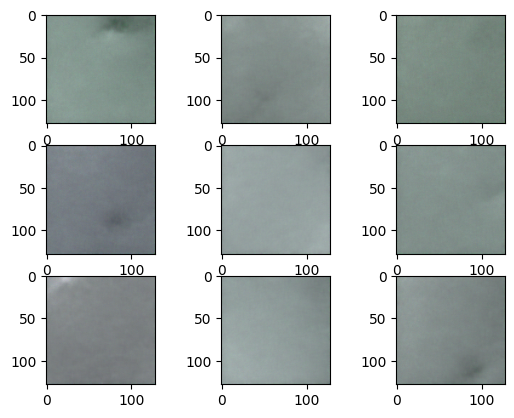

 14%|█▍        | 101/700 [07:17<8:17:24, 49.82s/it]

------------------------------


 15%|█▍        | 102/700 [07:20<5:55:13, 35.64s/it]

------------------------------
Train Loss EPOCH: 102: 0.0076
Train Learning Rate EPOCH: 102: 0.0002448
------------------------------


 15%|█▍        | 103/700 [07:22<4:16:01, 25.73s/it]

------------------------------
Train Loss EPOCH: 103: 0.0076
Train Learning Rate EPOCH: 103: 0.0002472
------------------------------


 15%|█▍        | 104/700 [07:25<3:06:29, 18.77s/it]

------------------------------
Train Loss EPOCH: 104: 0.0067
Train Learning Rate EPOCH: 104: 0.00024959999999999994
------------------------------


 15%|█▌        | 105/700 [07:28<2:17:46, 13.89s/it]

------------------------------
Train Loss EPOCH: 105: 0.0074
Train Learning Rate EPOCH: 105: 0.00025199999999999995
------------------------------


 15%|█▌        | 106/700 [07:30<1:43:46, 10.48s/it]

------------------------------
Train Loss EPOCH: 106: 0.0111
Train Learning Rate EPOCH: 106: 0.00025439999999999995
------------------------------


 15%|█▌        | 107/700 [07:33<1:20:00,  8.09s/it]

------------------------------
Train Loss EPOCH: 107: 0.0046
Train Learning Rate EPOCH: 107: 0.00025679999999999995
------------------------------


 15%|█▌        | 108/700 [07:35<1:03:35,  6.44s/it]

------------------------------
Train Loss EPOCH: 108: 0.0051
Train Learning Rate EPOCH: 108: 0.00025919999999999996
------------------------------


 16%|█▌        | 109/700 [07:38<52:00,  5.28s/it]  

------------------------------
Train Loss EPOCH: 109: 0.0077
Train Learning Rate EPOCH: 109: 0.00026159999999999996
------------------------------


 16%|█▌        | 110/700 [07:40<43:52,  4.46s/it]

------------------------------
Train Loss EPOCH: 110: 0.0081
Train Learning Rate EPOCH: 110: 0.00026399999999999997
------------------------------


 16%|█▌        | 111/700 [07:43<38:55,  3.97s/it]

------------------------------
Train Loss EPOCH: 111: 0.0122
Train Learning Rate EPOCH: 111: 0.00026639999999999997
------------------------------


 16%|█▌        | 112/700 [07:46<35:52,  3.66s/it]

------------------------------
Train Loss EPOCH: 112: 0.0112
Train Learning Rate EPOCH: 112: 0.0002688
------------------------------


 16%|█▌        | 113/700 [07:49<33:37,  3.44s/it]

------------------------------
Train Loss EPOCH: 113: 0.0118
Train Learning Rate EPOCH: 113: 0.0002712
------------------------------


 16%|█▋        | 114/700 [07:51<30:56,  3.17s/it]

------------------------------
Train Loss EPOCH: 114: 0.0102
Train Learning Rate EPOCH: 114: 0.0002736
------------------------------


 16%|█▋        | 115/700 [07:54<28:59,  2.97s/it]

------------------------------
Train Loss EPOCH: 115: 0.0084
Train Learning Rate EPOCH: 115: 0.000276
------------------------------


 17%|█▋        | 116/700 [07:57<27:40,  2.84s/it]

------------------------------
Train Loss EPOCH: 116: 0.0085
Train Learning Rate EPOCH: 116: 0.0002784
------------------------------


 17%|█▋        | 117/700 [07:59<26:42,  2.75s/it]

------------------------------
Train Loss EPOCH: 117: 0.0052
Train Learning Rate EPOCH: 117: 0.0002808
------------------------------


 17%|█▋        | 118/700 [08:02<26:06,  2.69s/it]

------------------------------
Train Loss EPOCH: 118: 0.0074
Train Learning Rate EPOCH: 118: 0.00028319999999999994
------------------------------


 17%|█▋        | 119/700 [08:04<25:42,  2.66s/it]

------------------------------
Train Loss EPOCH: 119: 0.0052
Train Learning Rate EPOCH: 119: 0.00028559999999999995
------------------------------


 17%|█▋        | 120/700 [08:07<25:19,  2.62s/it]

------------------------------
Train Loss EPOCH: 120: 0.0088
Train Learning Rate EPOCH: 120: 0.00028799999999999995
------------------------------


 17%|█▋        | 121/700 [08:09<25:01,  2.59s/it]

------------------------------
Train Loss EPOCH: 121: 0.0064
Train Learning Rate EPOCH: 121: 0.00029039999999999996
------------------------------


 17%|█▋        | 122/700 [08:12<24:50,  2.58s/it]

------------------------------
Train Loss EPOCH: 122: 0.0122
Train Learning Rate EPOCH: 122: 0.00029279999999999996
------------------------------


 18%|█▊        | 123/700 [08:14<24:48,  2.58s/it]

------------------------------
Train Loss EPOCH: 123: 0.0075
Train Learning Rate EPOCH: 123: 0.00029519999999999997
------------------------------


 18%|█▊        | 124/700 [08:17<24:47,  2.58s/it]

------------------------------
Train Loss EPOCH: 124: 0.0053
Train Learning Rate EPOCH: 124: 0.00029759999999999997
------------------------------


 18%|█▊        | 125/700 [08:20<24:35,  2.57s/it]

------------------------------
Train Loss EPOCH: 125: 0.0091
Train Learning Rate EPOCH: 125: 0.0003
------------------------------


 18%|█▊        | 126/700 [08:22<24:29,  2.56s/it]

------------------------------
Train Loss EPOCH: 126: 0.0072
Train Learning Rate EPOCH: 126: 0.0002999977611539094
------------------------------


 18%|█▊        | 127/700 [08:25<24:25,  2.56s/it]

------------------------------
Train Loss EPOCH: 127: 0.0046
Train Learning Rate EPOCH: 127: 0.00029999104468247
------------------------------


 18%|█▊        | 128/700 [08:27<24:25,  2.56s/it]

------------------------------
Train Loss EPOCH: 128: 0.0100
Train Learning Rate EPOCH: 128: 0.0002999798507861772
------------------------------


 18%|█▊        | 129/700 [08:30<24:26,  2.57s/it]

------------------------------
Train Loss EPOCH: 129: 0.0060
Train Learning Rate EPOCH: 129: 0.00029996417979918303
------------------------------


 19%|█▊        | 130/700 [08:32<24:18,  2.56s/it]

------------------------------
Train Loss EPOCH: 130: 0.0081
Train Learning Rate EPOCH: 130: 0.00029994403218928657
------------------------------


 19%|█▊        | 131/700 [08:35<24:11,  2.55s/it]

------------------------------
Train Loss EPOCH: 131: 0.0061
Train Learning Rate EPOCH: 131: 0.00029991940855791975
------------------------------


 19%|█▉        | 132/700 [08:37<24:07,  2.55s/it]

------------------------------
Train Loss EPOCH: 132: 0.0053
Train Learning Rate EPOCH: 132: 0.0002998903096401296
------------------------------


 19%|█▉        | 133/700 [08:40<24:08,  2.55s/it]

------------------------------
Train Loss EPOCH: 133: 0.0082
Train Learning Rate EPOCH: 133: 0.00029985673630455605
------------------------------


 19%|█▉        | 134/700 [08:43<24:10,  2.56s/it]

------------------------------
Train Loss EPOCH: 134: 0.0062
Train Learning Rate EPOCH: 134: 0.0002998186895534061
------------------------------


 19%|█▉        | 135/700 [08:45<24:03,  2.55s/it]

------------------------------
Train Loss EPOCH: 135: 0.0114
Train Learning Rate EPOCH: 135: 0.00029977617052242417
------------------------------


 19%|█▉        | 136/700 [08:48<23:55,  2.55s/it]

------------------------------
Train Loss EPOCH: 136: 0.0093
Train Learning Rate EPOCH: 136: 0.00029972918048085773
------------------------------


 20%|█▉        | 137/700 [08:50<23:52,  2.54s/it]

------------------------------
Train Loss EPOCH: 137: 0.0071
Train Learning Rate EPOCH: 137: 0.00029967772083141966
------------------------------


 20%|█▉        | 138/700 [08:53<23:46,  2.54s/it]

------------------------------
Train Loss EPOCH: 138: 0.0082
Train Learning Rate EPOCH: 138: 0.00029962179311024655
------------------------------


 20%|█▉        | 139/700 [08:55<23:53,  2.55s/it]

------------------------------
Train Loss EPOCH: 139: 0.0074
Train Learning Rate EPOCH: 139: 0.0002995613989868525
------------------------------


 20%|██        | 140/700 [08:58<23:44,  2.54s/it]

------------------------------
Train Loss EPOCH: 140: 0.0214
Train Learning Rate EPOCH: 140: 0.0002994965402640794
------------------------------


 20%|██        | 141/700 [09:00<23:36,  2.53s/it]

------------------------------
Train Loss EPOCH: 141: 0.0058
Train Learning Rate EPOCH: 141: 0.0002994272188780433
------------------------------


 20%|██        | 142/700 [09:03<23:33,  2.53s/it]

------------------------------
Train Loss EPOCH: 142: 0.0064
Train Learning Rate EPOCH: 142: 0.0002993534368980763
------------------------------


 20%|██        | 143/700 [09:05<23:33,  2.54s/it]

------------------------------
Train Loss EPOCH: 143: 0.0094
Train Learning Rate EPOCH: 143: 0.00029927519652666516
------------------------------


 21%|██        | 144/700 [09:08<23:43,  2.56s/it]

------------------------------
Train Loss EPOCH: 144: 0.0266
Train Learning Rate EPOCH: 144: 0.0002991925000993851
------------------------------


 21%|██        | 145/700 [09:11<23:43,  2.56s/it]

------------------------------
Train Loss EPOCH: 145: 0.0133
Train Learning Rate EPOCH: 145: 0.0002991053500848305
------------------------------


 21%|██        | 146/700 [09:13<23:54,  2.59s/it]

------------------------------
Train Loss EPOCH: 146: 0.0077
Train Learning Rate EPOCH: 146: 0.0002990137490845409
------------------------------


 21%|██        | 147/700 [09:16<23:41,  2.57s/it]

------------------------------
Train Loss EPOCH: 147: 0.0185
Train Learning Rate EPOCH: 147: 0.00029891769983292354
------------------------------


 21%|██        | 148/700 [09:18<23:32,  2.56s/it]

------------------------------
Train Loss EPOCH: 148: 0.0083
Train Learning Rate EPOCH: 148: 0.0002988172051971717
------------------------------


 21%|██▏       | 149/700 [09:21<23:36,  2.57s/it]

------------------------------
Train Loss EPOCH: 149: 0.0117
Train Learning Rate EPOCH: 149: 0.00029871226817717884
------------------------------


 21%|██▏       | 150/700 [09:23<23:32,  2.57s/it]

------------------------------
Train Loss EPOCH: 150: 0.0143
Train Learning Rate EPOCH: 150: 0.0002986028919054496
------------------------------


 22%|██▏       | 151/700 [09:26<23:21,  2.55s/it]

------------------------------
Train Loss EPOCH: 151: 0.0143
Train Learning Rate EPOCH: 151: 0.00029848907964700577
------------------------------


 22%|██▏       | 152/700 [09:28<23:14,  2.54s/it]

------------------------------
Train Loss EPOCH: 152: 0.0080
Train Learning Rate EPOCH: 152: 0.0002983708347992891
------------------------------


 22%|██▏       | 153/700 [09:31<23:10,  2.54s/it]

------------------------------
Train Loss EPOCH: 153: 0.0109
Train Learning Rate EPOCH: 153: 0.00029824816089205986
------------------------------


 22%|██▏       | 154/700 [09:34<23:15,  2.56s/it]

------------------------------
Train Loss EPOCH: 154: 0.0112
Train Learning Rate EPOCH: 154: 0.0002981210615872912
------------------------------


 22%|██▏       | 155/700 [09:36<23:13,  2.56s/it]

------------------------------
Train Loss EPOCH: 155: 0.0059
Train Learning Rate EPOCH: 155: 0.0002979895406790603
------------------------------


 22%|██▏       | 156/700 [09:39<23:06,  2.55s/it]

------------------------------
Train Loss EPOCH: 156: 0.0058
Train Learning Rate EPOCH: 156: 0.00029785360209343473
------------------------------


 22%|██▏       | 157/700 [09:41<23:02,  2.55s/it]

------------------------------
Train Loss EPOCH: 157: 0.0075
Train Learning Rate EPOCH: 157: 0.0002977132498883555
------------------------------


 23%|██▎       | 158/700 [09:44<22:55,  2.54s/it]

------------------------------
Train Loss EPOCH: 158: 0.0067
Train Learning Rate EPOCH: 158: 0.00029756848825351575
------------------------------


 23%|██▎       | 159/700 [09:46<22:58,  2.55s/it]

------------------------------
Train Loss EPOCH: 159: 0.0065
Train Learning Rate EPOCH: 159: 0.0002974193215102357
------------------------------


 23%|██▎       | 160/700 [09:49<22:56,  2.55s/it]

------------------------------
Train Loss EPOCH: 160: 0.0138
Train Learning Rate EPOCH: 160: 0.00029726575411133377
------------------------------


 23%|██▎       | 161/700 [09:51<22:47,  2.54s/it]

------------------------------
Train Loss EPOCH: 161: 0.0096
Train Learning Rate EPOCH: 161: 0.00029710779064099355
------------------------------


 23%|██▎       | 162/700 [09:54<22:43,  2.53s/it]

------------------------------
Train Loss EPOCH: 162: 0.0066
Train Learning Rate EPOCH: 162: 0.0002969454358146271
------------------------------


 23%|██▎       | 163/700 [09:57<23:25,  2.62s/it]

------------------------------
Train Loss EPOCH: 163: 0.0063
Train Learning Rate EPOCH: 163: 0.0002967786944787339
------------------------------


 23%|██▎       | 164/700 [09:59<23:14,  2.60s/it]

------------------------------
Train Loss EPOCH: 164: 0.0035
Train Learning Rate EPOCH: 164: 0.00029660757161075645
------------------------------


 24%|██▎       | 165/700 [10:02<23:03,  2.59s/it]

------------------------------
Train Loss EPOCH: 165: 0.0060
Train Learning Rate EPOCH: 165: 0.00029643207231893167
------------------------------


 24%|██▎       | 166/700 [10:04<22:51,  2.57s/it]

------------------------------
Train Loss EPOCH: 166: 0.0071
Train Learning Rate EPOCH: 166: 0.0002962522018421382
------------------------------


 24%|██▍       | 167/700 [10:07<22:42,  2.56s/it]

------------------------------
Train Loss EPOCH: 167: 0.0041
Train Learning Rate EPOCH: 167: 0.0002960679655497403
------------------------------


 24%|██▍       | 168/700 [10:09<22:36,  2.55s/it]

------------------------------
Train Loss EPOCH: 168: 0.0075
Train Learning Rate EPOCH: 168: 0.00029587936894142735
------------------------------


 24%|██▍       | 169/700 [10:12<22:39,  2.56s/it]

------------------------------
Train Loss EPOCH: 169: 0.0204
Train Learning Rate EPOCH: 169: 0.0002956864176470497
------------------------------


 24%|██▍       | 170/700 [10:15<22:40,  2.57s/it]

------------------------------
Train Loss EPOCH: 170: 0.0156
Train Learning Rate EPOCH: 170: 0.0002954891174264507
------------------------------


 24%|██▍       | 171/700 [10:17<22:29,  2.55s/it]

------------------------------
Train Loss EPOCH: 171: 0.0120
Train Learning Rate EPOCH: 171: 0.00029528747416929463
------------------------------


 25%|██▍       | 172/700 [10:20<22:27,  2.55s/it]

------------------------------
Train Loss EPOCH: 172: 0.0099
Train Learning Rate EPOCH: 172: 0.00029508149389489123
------------------------------


 25%|██▍       | 173/700 [10:22<22:23,  2.55s/it]

------------------------------
Train Loss EPOCH: 173: 0.0106
Train Learning Rate EPOCH: 173: 0.00029487118275201544
------------------------------


 25%|██▍       | 174/700 [10:25<22:21,  2.55s/it]

------------------------------
Train Loss EPOCH: 174: 0.0095
Train Learning Rate EPOCH: 174: 0.0002946565470187245
------------------------------


 25%|██▌       | 175/700 [10:27<22:22,  2.56s/it]

------------------------------
Train Loss EPOCH: 175: 0.0086
Train Learning Rate EPOCH: 175: 0.0002944375931021699
------------------------------


 25%|██▌       | 176/700 [10:30<22:16,  2.55s/it]

------------------------------
Train Loss EPOCH: 176: 0.0075
Train Learning Rate EPOCH: 176: 0.00029421432753840655
------------------------------


 25%|██▌       | 177/700 [10:32<22:13,  2.55s/it]

------------------------------
Train Loss EPOCH: 177: 0.0047
Train Learning Rate EPOCH: 177: 0.00029398675699219775
------------------------------


 25%|██▌       | 178/700 [10:35<22:08,  2.54s/it]

------------------------------
Train Loss EPOCH: 178: 0.0179
Train Learning Rate EPOCH: 178: 0.00029375488825681567
------------------------------


 26%|██▌       | 179/700 [10:38<22:11,  2.56s/it]

------------------------------
Train Loss EPOCH: 179: 0.0075
Train Learning Rate EPOCH: 179: 0.00029351872825383933
------------------------------


 26%|██▌       | 180/700 [10:40<22:14,  2.57s/it]

------------------------------
Train Loss EPOCH: 180: 0.0041
Train Learning Rate EPOCH: 180: 0.0002932782840329472
------------------------------


 26%|██▌       | 181/700 [10:43<22:03,  2.55s/it]

------------------------------
Train Loss EPOCH: 181: 0.0102
Train Learning Rate EPOCH: 181: 0.00029303356277170743
------------------------------


 26%|██▌       | 182/700 [10:45<21:58,  2.55s/it]

------------------------------
Train Loss EPOCH: 182: 0.0044
Train Learning Rate EPOCH: 182: 0.0002927845717753632
------------------------------


 26%|██▌       | 183/700 [10:48<21:53,  2.54s/it]

------------------------------
Train Loss EPOCH: 183: 0.0044
Train Learning Rate EPOCH: 183: 0.00029253131847661477
------------------------------


 26%|██▋       | 184/700 [10:50<21:51,  2.54s/it]

------------------------------
Train Loss EPOCH: 184: 0.0371
Train Learning Rate EPOCH: 184: 0.00029227381043539757
------------------------------


 26%|██▋       | 185/700 [10:53<21:54,  2.55s/it]

------------------------------
Train Loss EPOCH: 185: 0.0055
Train Learning Rate EPOCH: 185: 0.00029201205533865653
------------------------------


 27%|██▋       | 186/700 [10:55<21:50,  2.55s/it]

------------------------------
Train Loss EPOCH: 186: 0.0079
Train Learning Rate EPOCH: 186: 0.0002917460610001167
------------------------------


 27%|██▋       | 187/700 [10:58<21:46,  2.55s/it]

------------------------------
Train Loss EPOCH: 187: 0.0053
Train Learning Rate EPOCH: 187: 0.0002914758353600498
------------------------------


 27%|██▋       | 188/700 [11:00<21:42,  2.54s/it]

------------------------------
Train Loss EPOCH: 188: 0.0182
Train Learning Rate EPOCH: 188: 0.00029120138648503743
------------------------------


 27%|██▋       | 189/700 [11:03<21:39,  2.54s/it]

------------------------------
Train Loss EPOCH: 189: 0.0054
Train Learning Rate EPOCH: 189: 0.00029092272256773025
------------------------------


 27%|██▋       | 190/700 [11:06<21:48,  2.57s/it]

------------------------------
Train Loss EPOCH: 190: 0.0046
Train Learning Rate EPOCH: 190: 0.00029063985192660303
------------------------------


 27%|██▋       | 191/700 [11:08<21:37,  2.55s/it]

------------------------------
Train Loss EPOCH: 191: 0.0039
Train Learning Rate EPOCH: 191: 0.00029035278300570695
------------------------------


 27%|██▋       | 192/700 [11:11<21:33,  2.55s/it]

------------------------------
Train Loss EPOCH: 192: 0.0051
Train Learning Rate EPOCH: 192: 0.00029006152437441703
------------------------------


 28%|██▊       | 193/700 [11:13<21:28,  2.54s/it]

------------------------------
Train Loss EPOCH: 193: 0.0042
Train Learning Rate EPOCH: 193: 0.0002897660847271766
------------------------------


 28%|██▊       | 194/700 [11:16<21:23,  2.54s/it]

------------------------------
Train Loss EPOCH: 194: 0.0057
Train Learning Rate EPOCH: 194: 0.00028946647288323766
------------------------------


 28%|██▊       | 195/700 [11:18<21:30,  2.56s/it]

------------------------------
Train Loss EPOCH: 195: 0.0045
Train Learning Rate EPOCH: 195: 0.00028916269778639765
------------------------------


 28%|██▊       | 196/700 [11:21<21:28,  2.56s/it]

------------------------------
Train Loss EPOCH: 196: 0.0038
Train Learning Rate EPOCH: 196: 0.00028885476850473235
------------------------------


 28%|██▊       | 197/700 [11:23<21:23,  2.55s/it]

------------------------------
Train Loss EPOCH: 197: 0.0060
Train Learning Rate EPOCH: 197: 0.00028854269423032533
------------------------------


 28%|██▊       | 198/700 [11:26<21:15,  2.54s/it]

------------------------------
Train Loss EPOCH: 198: 0.0072
Train Learning Rate EPOCH: 198: 0.0002882264842789936
------------------------------


 28%|██▊       | 199/700 [11:28<21:11,  2.54s/it]

------------------------------
Train Loss EPOCH: 199: 0.0042
Train Learning Rate EPOCH: 199: 0.0002879061480900092
------------------------------


 29%|██▊       | 200/700 [11:31<21:13,  2.55s/it]

------------------------------
Train Loss EPOCH: 200: 0.0082
Train Learning Rate EPOCH: 200: 0.0002875816952258179
------------------------------


100%|██████████| 4/4 [00:02<00:00,  1.58it/s]

------------------------------
Train Loss EPOCH: 201: 0.0060
Train Learning Rate EPOCH: 201: 0.0002872531353717534


  0%|          | 0/1000 [00:00<?, ?it/s]

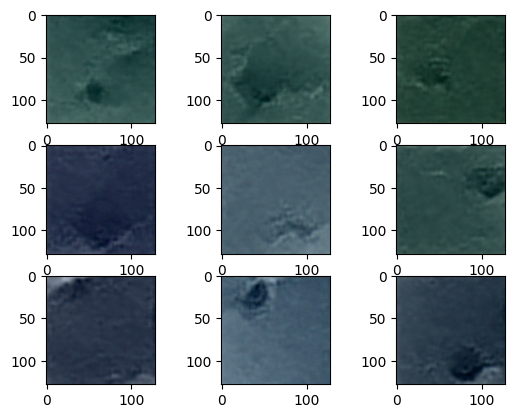

 29%|██▊       | 201/700 [14:11<6:54:25, 49.83s/it]

------------------------------


 29%|██▉       | 202/700 [14:14<4:55:48, 35.64s/it]

------------------------------
Train Loss EPOCH: 202: 0.0051
Train Learning Rate EPOCH: 202: 0.0002869204783357482
------------------------------


 29%|██▉       | 203/700 [14:16<3:32:55, 25.71s/it]

------------------------------
Train Loss EPOCH: 203: 0.0047
Train Learning Rate EPOCH: 203: 0.00028658373404804113
------------------------------


 29%|██▉       | 204/700 [14:19<2:35:00, 18.75s/it]

------------------------------
Train Loss EPOCH: 204: 0.0042
Train Learning Rate EPOCH: 204: 0.0002862429125608805
------------------------------


 29%|██▉       | 205/700 [14:21<1:54:37, 13.89s/it]

------------------------------
Train Loss EPOCH: 205: 0.0046
Train Learning Rate EPOCH: 205: 0.00028589802404822455
------------------------------


 29%|██▉       | 206/700 [14:24<1:26:36, 10.52s/it]

------------------------------
Train Loss EPOCH: 206: 0.0071
Train Learning Rate EPOCH: 206: 0.000285549078805437
------------------------------


 30%|██▉       | 207/700 [14:26<1:06:44,  8.12s/it]

------------------------------
Train Loss EPOCH: 207: 0.0027
Train Learning Rate EPOCH: 207: 0.0002851960872489806
------------------------------


 30%|██▉       | 208/700 [14:29<52:47,  6.44s/it]  

------------------------------
Train Loss EPOCH: 208: 0.0032
Train Learning Rate EPOCH: 208: 0.0002848390599161056
------------------------------


 30%|██▉       | 209/700 [14:32<43:06,  5.27s/it]

------------------------------
Train Loss EPOCH: 209: 0.0050
Train Learning Rate EPOCH: 209: 0.0002844780074645352
------------------------------


 30%|███       | 210/700 [14:34<36:22,  4.45s/it]

------------------------------
Train Loss EPOCH: 210: 0.0040
Train Learning Rate EPOCH: 210: 0.00028411294067214764
------------------------------


 30%|███       | 211/700 [14:37<31:45,  3.90s/it]

------------------------------
Train Loss EPOCH: 211: 0.0070
Train Learning Rate EPOCH: 211: 0.00028374387043665454
------------------------------


 30%|███       | 212/700 [14:39<28:26,  3.50s/it]

------------------------------
Train Loss EPOCH: 212: 0.0052
Train Learning Rate EPOCH: 212: 0.00028337080777527513
------------------------------


 30%|███       | 213/700 [14:42<26:01,  3.21s/it]

------------------------------
Train Loss EPOCH: 213: 0.0046
Train Learning Rate EPOCH: 213: 0.00028299376382440796
------------------------------


 31%|███       | 214/700 [14:44<24:18,  3.00s/it]

------------------------------
Train Loss EPOCH: 214: 0.0048
Train Learning Rate EPOCH: 214: 0.000282612749839298
------------------------------


 31%|███       | 215/700 [14:47<23:07,  2.86s/it]

------------------------------
Train Loss EPOCH: 215: 0.0045
Train Learning Rate EPOCH: 215: 0.0002822277771937007
------------------------------


 31%|███       | 216/700 [14:49<22:21,  2.77s/it]

------------------------------
Train Loss EPOCH: 216: 0.0041
Train Learning Rate EPOCH: 216: 0.000281838857379543
------------------------------


 31%|███       | 217/700 [14:52<21:48,  2.71s/it]

------------------------------
Train Loss EPOCH: 217: 0.0028
Train Learning Rate EPOCH: 217: 0.0002814460020065795
------------------------------


 31%|███       | 218/700 [14:54<21:18,  2.65s/it]

------------------------------
Train Loss EPOCH: 218: 0.0043
Train Learning Rate EPOCH: 218: 0.00028104922280204646
------------------------------


 31%|███▏      | 219/700 [14:57<20:58,  2.62s/it]

------------------------------
Train Loss EPOCH: 219: 0.0029
Train Learning Rate EPOCH: 219: 0.0002806485316103115
------------------------------


 31%|███▏      | 220/700 [15:00<20:43,  2.59s/it]

------------------------------
Train Loss EPOCH: 220: 0.0052
Train Learning Rate EPOCH: 220: 0.00028024394039252005
------------------------------


 32%|███▏      | 221/700 [15:02<20:37,  2.58s/it]

------------------------------
Train Loss EPOCH: 221: 0.0039
Train Learning Rate EPOCH: 221: 0.0002798354612262383
------------------------------


 32%|███▏      | 222/700 [15:05<20:32,  2.58s/it]

------------------------------
Train Loss EPOCH: 222: 0.0079
Train Learning Rate EPOCH: 222: 0.0002794231063050927
------------------------------


 32%|███▏      | 223/700 [15:07<20:24,  2.57s/it]

------------------------------
Train Loss EPOCH: 223: 0.0048
Train Learning Rate EPOCH: 223: 0.000279006887938406
------------------------------


 32%|███▏      | 224/700 [15:10<20:24,  2.57s/it]

------------------------------
Train Loss EPOCH: 224: 0.0033
Train Learning Rate EPOCH: 224: 0.00027858681855082976
------------------------------


 32%|███▏      | 225/700 [15:12<20:15,  2.56s/it]

------------------------------
Train Loss EPOCH: 225: 0.0058
Train Learning Rate EPOCH: 225: 0.0002781629106819733
------------------------------


 32%|███▏      | 226/700 [15:15<20:16,  2.57s/it]

------------------------------
Train Loss EPOCH: 226: 0.0041
Train Learning Rate EPOCH: 226: 0.0002777351769860296
------------------------------


 32%|███▏      | 227/700 [15:17<20:13,  2.57s/it]

------------------------------
Train Loss EPOCH: 227: 0.0029
Train Learning Rate EPOCH: 227: 0.00027730363023139757
------------------------------


 33%|███▎      | 228/700 [15:20<20:04,  2.55s/it]

------------------------------
Train Loss EPOCH: 228: 0.0061
Train Learning Rate EPOCH: 228: 0.00027686828330030075
------------------------------


 33%|███▎      | 229/700 [15:23<19:59,  2.55s/it]

------------------------------
Train Loss EPOCH: 229: 0.0041
Train Learning Rate EPOCH: 229: 0.00027642914918840275
------------------------------


 33%|███▎      | 230/700 [15:25<19:54,  2.54s/it]

------------------------------
Train Loss EPOCH: 230: 0.0065
Train Learning Rate EPOCH: 230: 0.0002759862410044195
------------------------------


 33%|███▎      | 231/700 [15:28<19:51,  2.54s/it]

------------------------------
Train Loss EPOCH: 231: 0.0045
Train Learning Rate EPOCH: 231: 0.0002755395719697276
------------------------------


 33%|███▎      | 232/700 [15:30<19:56,  2.56s/it]

------------------------------
Train Loss EPOCH: 232: 0.0041
Train Learning Rate EPOCH: 232: 0.0002750891554179702
------------------------------


 33%|███▎      | 233/700 [15:33<19:50,  2.55s/it]

------------------------------
Train Loss EPOCH: 233: 0.0074
Train Learning Rate EPOCH: 233: 0.00027463500479465834
------------------------------


 33%|███▎      | 234/700 [15:35<19:46,  2.55s/it]

------------------------------
Train Loss EPOCH: 234: 0.0078
Train Learning Rate EPOCH: 234: 0.00027417713365676997
------------------------------


 34%|███▎      | 235/700 [15:38<19:42,  2.54s/it]

------------------------------
Train Loss EPOCH: 235: 0.0113
Train Learning Rate EPOCH: 235: 0.0002737155556723452
------------------------------


 34%|███▎      | 236/700 [15:40<19:42,  2.55s/it]

------------------------------
Train Loss EPOCH: 236: 0.0066
Train Learning Rate EPOCH: 236: 0.0002732502846200784
------------------------------


 34%|███▍      | 237/700 [15:43<19:46,  2.56s/it]

------------------------------
Train Loss EPOCH: 237: 0.0041
Train Learning Rate EPOCH: 237: 0.00027278133438890636
------------------------------


 34%|███▍      | 238/700 [15:45<19:37,  2.55s/it]

------------------------------
Train Loss EPOCH: 238: 0.0041
Train Learning Rate EPOCH: 238: 0.0002723087189775944
------------------------------


 34%|███▍      | 239/700 [15:48<19:33,  2.55s/it]

------------------------------
Train Loss EPOCH: 239: 0.0039
Train Learning Rate EPOCH: 239: 0.00027183245249431807
------------------------------


 34%|███▍      | 240/700 [15:51<19:30,  2.54s/it]

------------------------------
Train Loss EPOCH: 240: 0.0107
Train Learning Rate EPOCH: 240: 0.0002713525491562421
------------------------------


 34%|███▍      | 241/700 [15:53<19:29,  2.55s/it]

------------------------------
Train Loss EPOCH: 241: 0.0038
Train Learning Rate EPOCH: 241: 0.000270869023289096
------------------------------


 35%|███▍      | 242/700 [15:56<19:37,  2.57s/it]

------------------------------
Train Loss EPOCH: 242: 0.0041
Train Learning Rate EPOCH: 242: 0.0002703818893267463
------------------------------


 35%|███▍      | 243/700 [15:58<19:33,  2.57s/it]

------------------------------
Train Loss EPOCH: 243: 0.0065
Train Learning Rate EPOCH: 243: 0.000269891161810766
------------------------------


 35%|███▍      | 244/700 [16:01<19:24,  2.55s/it]

------------------------------
Train Loss EPOCH: 244: 0.0116
Train Learning Rate EPOCH: 244: 0.00026939685539000013
------------------------------


 35%|███▌      | 245/700 [16:03<19:19,  2.55s/it]

------------------------------
Train Loss EPOCH: 245: 0.0056
Train Learning Rate EPOCH: 245: 0.0002688989848201287
------------------------------


 35%|███▌      | 246/700 [16:06<19:18,  2.55s/it]

------------------------------
Train Loss EPOCH: 246: 0.0042
Train Learning Rate EPOCH: 246: 0.0002683975649632261
------------------------------


 35%|███▌      | 247/700 [16:09<19:25,  2.57s/it]

------------------------------
Train Loss EPOCH: 247: 0.0087
Train Learning Rate EPOCH: 247: 0.00026789261078731736
------------------------------


 35%|███▌      | 248/700 [16:11<19:22,  2.57s/it]

------------------------------
Train Loss EPOCH: 248: 0.0045
Train Learning Rate EPOCH: 248: 0.00026738413736593174
------------------------------


 36%|███▌      | 249/700 [16:14<19:13,  2.56s/it]

------------------------------
Train Loss EPOCH: 249: 0.0052
Train Learning Rate EPOCH: 249: 0.00026687215987765227
------------------------------


 36%|███▌      | 250/700 [16:16<19:07,  2.55s/it]

------------------------------
Train Loss EPOCH: 250: 0.0040
Train Learning Rate EPOCH: 250: 0.00026635669360566296
------------------------------


 36%|███▌      | 251/700 [16:19<19:02,  2.54s/it]

------------------------------
Train Loss EPOCH: 251: 0.0058
Train Learning Rate EPOCH: 251: 0.00026583775393729237
------------------------------


 36%|███▌      | 252/700 [16:21<19:05,  2.56s/it]

------------------------------
Train Loss EPOCH: 252: 0.0029
Train Learning Rate EPOCH: 252: 0.00026531535636355446
------------------------------


 36%|███▌      | 253/700 [16:24<19:04,  2.56s/it]

------------------------------
Train Loss EPOCH: 253: 0.0053
Train Learning Rate EPOCH: 253: 0.0002647895164786862
------------------------------


 36%|███▋      | 254/700 [16:26<18:57,  2.55s/it]

------------------------------
Train Loss EPOCH: 254: 0.0060
Train Learning Rate EPOCH: 254: 0.0002642602499796818
------------------------------


 36%|███▋      | 255/700 [16:29<18:52,  2.55s/it]

------------------------------
Train Loss EPOCH: 255: 0.0030
Train Learning Rate EPOCH: 255: 0.0002637275726658244
------------------------------


 37%|███▋      | 256/700 [16:31<18:50,  2.55s/it]

------------------------------
Train Loss EPOCH: 256: 0.0032
Train Learning Rate EPOCH: 256: 0.0002631915004382142
------------------------------


 37%|███▋      | 257/700 [16:34<18:51,  2.55s/it]

------------------------------
Train Loss EPOCH: 257: 0.0046
Train Learning Rate EPOCH: 257: 0.00026265204929929413
------------------------------


 37%|███▋      | 258/700 [16:37<18:51,  2.56s/it]

------------------------------
Train Loss EPOCH: 258: 0.0042
Train Learning Rate EPOCH: 258: 0.0002621092353523718
------------------------------


 37%|███▋      | 259/700 [16:39<18:44,  2.55s/it]

------------------------------
Train Loss EPOCH: 259: 0.0041
Train Learning Rate EPOCH: 259: 0.0002615630748011389
------------------------------


 37%|███▋      | 260/700 [16:42<18:42,  2.55s/it]

------------------------------
Train Loss EPOCH: 260: 0.0090
Train Learning Rate EPOCH: 260: 0.00026101358394918777
------------------------------


 37%|███▋      | 261/700 [16:44<18:34,  2.54s/it]

------------------------------
Train Loss EPOCH: 261: 0.0050
Train Learning Rate EPOCH: 261: 0.00026046077919952425
------------------------------


 37%|███▋      | 262/700 [16:47<18:37,  2.55s/it]

------------------------------
Train Loss EPOCH: 262: 0.0041
Train Learning Rate EPOCH: 262: 0.00025990467705407837
------------------------------


 38%|███▊      | 263/700 [16:49<18:41,  2.57s/it]

------------------------------
Train Loss EPOCH: 263: 0.0042
Train Learning Rate EPOCH: 263: 0.0002593452941132117
------------------------------


 38%|███▊      | 264/700 [16:52<18:32,  2.55s/it]

------------------------------
Train Loss EPOCH: 264: 0.0021
Train Learning Rate EPOCH: 264: 0.00025878264707522174
------------------------------


 38%|███▊      | 265/700 [16:54<18:28,  2.55s/it]

------------------------------
Train Loss EPOCH: 265: 0.0039
Train Learning Rate EPOCH: 265: 0.00025821675273584335
------------------------------


 38%|███▊      | 266/700 [16:57<18:24,  2.54s/it]

------------------------------
Train Loss EPOCH: 266: 0.0047
Train Learning Rate EPOCH: 266: 0.00025764762798774764
------------------------------


 38%|███▊      | 267/700 [16:59<18:21,  2.54s/it]

------------------------------
Train Loss EPOCH: 267: 0.0028
Train Learning Rate EPOCH: 267: 0.0002570752898200375
------------------------------


 38%|███▊      | 268/700 [17:02<18:21,  2.55s/it]

------------------------------
Train Loss EPOCH: 268: 0.0049
Train Learning Rate EPOCH: 268: 0.0002564997553177406
------------------------------


 38%|███▊      | 269/700 [17:05<18:16,  2.54s/it]

------------------------------
Train Loss EPOCH: 269: 0.0116
Train Learning Rate EPOCH: 269: 0.0002559210416612991
------------------------------


 39%|███▊      | 270/700 [17:07<18:10,  2.54s/it]

------------------------------
Train Loss EPOCH: 270: 0.0135
Train Learning Rate EPOCH: 270: 0.0002553391661260571
------------------------------


 39%|███▊      | 271/700 [17:10<18:08,  2.54s/it]

------------------------------
Train Loss EPOCH: 271: 0.0061
Train Learning Rate EPOCH: 271: 0.00025475414608174484
------------------------------


 39%|███▉      | 272/700 [17:12<18:10,  2.55s/it]

------------------------------
Train Loss EPOCH: 272: 0.0072
Train Learning Rate EPOCH: 272: 0.00025416599899196027
------------------------------


 39%|███▉      | 273/700 [17:15<18:13,  2.56s/it]

------------------------------
Train Loss EPOCH: 273: 0.0070
Train Learning Rate EPOCH: 273: 0.00025357474241364744
------------------------------


 39%|███▉      | 274/700 [17:17<18:06,  2.55s/it]

------------------------------
Train Loss EPOCH: 274: 0.0060
Train Learning Rate EPOCH: 274: 0.0002529803939965728
------------------------------


 39%|███▉      | 275/700 [17:20<18:02,  2.55s/it]

------------------------------
Train Loss EPOCH: 275: 0.0058
Train Learning Rate EPOCH: 275: 0.0002523829714827981
------------------------------


 39%|███▉      | 276/700 [17:22<17:56,  2.54s/it]

------------------------------
Train Loss EPOCH: 276: 0.0049
Train Learning Rate EPOCH: 276: 0.0002517824927061507
------------------------------


 40%|███▉      | 277/700 [17:25<17:57,  2.55s/it]

------------------------------
Train Loss EPOCH: 277: 0.0036
Train Learning Rate EPOCH: 277: 0.0002511789755916916
------------------------------


 40%|███▉      | 278/700 [17:28<18:06,  2.57s/it]

------------------------------
Train Loss EPOCH: 278: 0.0111
Train Learning Rate EPOCH: 278: 0.0002505724381551797
------------------------------


 40%|███▉      | 279/700 [17:30<18:05,  2.58s/it]

------------------------------
Train Loss EPOCH: 279: 0.0051
Train Learning Rate EPOCH: 279: 0.0002499628985025347
------------------------------


 40%|████      | 280/700 [17:33<17:56,  2.56s/it]

------------------------------
Train Loss EPOCH: 280: 0.0028
Train Learning Rate EPOCH: 280: 0.00024935037482929614
------------------------------


 40%|████      | 281/700 [17:35<17:47,  2.55s/it]

------------------------------
Train Loss EPOCH: 281: 0.0065
Train Learning Rate EPOCH: 281: 0.00024873488542008043
------------------------------


 40%|████      | 282/700 [17:38<17:43,  2.54s/it]

------------------------------
Train Loss EPOCH: 282: 0.0028
Train Learning Rate EPOCH: 282: 0.000248116448648035
------------------------------


 40%|████      | 283/700 [17:40<17:48,  2.56s/it]

------------------------------
Train Loss EPOCH: 283: 0.0029
Train Learning Rate EPOCH: 283: 0.0002474950829742899
------------------------------


 41%|████      | 284/700 [17:43<17:44,  2.56s/it]

------------------------------
Train Loss EPOCH: 284: 0.0197
Train Learning Rate EPOCH: 284: 0.0002468708069474065
------------------------------


 41%|████      | 285/700 [17:45<17:38,  2.55s/it]

------------------------------
Train Loss EPOCH: 285: 0.0029
Train Learning Rate EPOCH: 285: 0.00024624363920282413
------------------------------


 41%|████      | 286/700 [17:48<17:33,  2.54s/it]

------------------------------
Train Loss EPOCH: 286: 0.0055
Train Learning Rate EPOCH: 286: 0.0002456135984623034
------------------------------


 41%|████      | 287/700 [17:51<17:27,  2.54s/it]

------------------------------
Train Loss EPOCH: 287: 0.0036
Train Learning Rate EPOCH: 287: 0.00024498070353336774
------------------------------


 41%|████      | 288/700 [17:53<17:28,  2.55s/it]

------------------------------
Train Loss EPOCH: 288: 0.0154
Train Learning Rate EPOCH: 288: 0.00024434497330874156
------------------------------


 41%|████▏     | 289/700 [17:56<17:27,  2.55s/it]

------------------------------
Train Loss EPOCH: 289: 0.0041
Train Learning Rate EPOCH: 289: 0.00024370642676578653
------------------------------


 41%|████▏     | 290/700 [17:58<17:21,  2.54s/it]

------------------------------
Train Loss EPOCH: 290: 0.0034
Train Learning Rate EPOCH: 290: 0.00024306508296593522
------------------------------


 42%|████▏     | 291/700 [18:01<17:16,  2.53s/it]

------------------------------
Train Loss EPOCH: 291: 0.0030
Train Learning Rate EPOCH: 291: 0.00024242096105412162
------------------------------


 42%|████▏     | 292/700 [18:03<17:13,  2.53s/it]

------------------------------
Train Loss EPOCH: 292: 0.0039
Train Learning Rate EPOCH: 292: 0.00024177408025821004
------------------------------


 42%|████▏     | 293/700 [18:06<17:14,  2.54s/it]

------------------------------
Train Loss EPOCH: 293: 0.0031
Train Learning Rate EPOCH: 293: 0.0002411244598884211
------------------------------


 42%|████▏     | 294/700 [18:08<17:15,  2.55s/it]

------------------------------
Train Loss EPOCH: 294: 0.0047
Train Learning Rate EPOCH: 294: 0.00024047211933675514
------------------------------


 42%|████▏     | 295/700 [18:11<17:10,  2.54s/it]

------------------------------
Train Loss EPOCH: 295: 0.0036
Train Learning Rate EPOCH: 295: 0.00023981707807641336
------------------------------


 42%|████▏     | 296/700 [18:13<17:07,  2.54s/it]

------------------------------
Train Loss EPOCH: 296: 0.0029
Train Learning Rate EPOCH: 296: 0.0002391593556612167
------------------------------


 42%|████▏     | 297/700 [18:16<17:01,  2.54s/it]

------------------------------
Train Loss EPOCH: 297: 0.0051
Train Learning Rate EPOCH: 297: 0.00023849897172502178
------------------------------


 43%|████▎     | 298/700 [18:18<17:02,  2.54s/it]

------------------------------
Train Loss EPOCH: 298: 0.0067
Train Learning Rate EPOCH: 298: 0.0002378359459811354
------------------------------


 43%|████▎     | 299/700 [18:21<17:04,  2.56s/it]

------------------------------
Train Loss EPOCH: 299: 0.0038
Train Learning Rate EPOCH: 299: 0.00023717029822172532
------------------------------


 43%|████▎     | 300/700 [18:24<16:58,  2.55s/it]

------------------------------
Train Loss EPOCH: 300: 0.0072
Train Learning Rate EPOCH: 300: 0.00023650204831723008
------------------------------


100%|██████████| 4/4 [00:02<00:00,  1.59it/s]

------------------------------
Train Loss EPOCH: 301: 0.0054
Train Learning Rate EPOCH: 301: 0.0002358312162157654


  0%|          | 0/1000 [00:00<?, ?it/s]

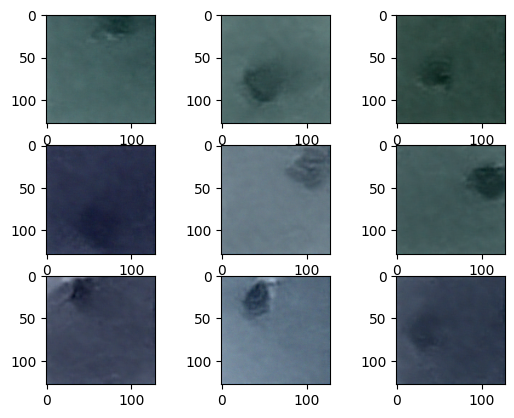

 43%|████▎     | 301/700 [21:04<5:31:10, 49.80s/it]

------------------------------


 43%|████▎     | 302/700 [21:06<3:56:16, 35.62s/it]

------------------------------
Train Loss EPOCH: 302: 0.0040
Train Learning Rate EPOCH: 302: 0.00023515782194252907
------------------------------


 43%|████▎     | 303/700 [21:09<2:50:00, 25.70s/it]

------------------------------
Train Loss EPOCH: 303: 0.0039
Train Learning Rate EPOCH: 303: 0.00023448188559920295
------------------------------


 43%|████▎     | 304/700 [21:11<2:03:42, 18.74s/it]

------------------------------
Train Loss EPOCH: 304: 0.0034
Train Learning Rate EPOCH: 304: 0.00023380342736335278
------------------------------


 44%|████▎     | 305/700 [21:14<1:31:29, 13.90s/it]

------------------------------
Train Loss EPOCH: 305: 0.0038
Train Learning Rate EPOCH: 305: 0.00023312246748782622
------------------------------


 44%|████▎     | 306/700 [21:16<1:08:57, 10.50s/it]

------------------------------
Train Loss EPOCH: 306: 0.0058
Train Learning Rate EPOCH: 306: 0.00023243902630014793
------------------------------


 44%|████▍     | 307/700 [21:19<53:06,  8.11s/it]  

------------------------------
Train Loss EPOCH: 307: 0.0021
Train Learning Rate EPOCH: 307: 0.00023175312420191312
------------------------------


 44%|████▍     | 308/700 [21:21<42:02,  6.44s/it]

------------------------------
Train Loss EPOCH: 308: 0.0026
Train Learning Rate EPOCH: 308: 0.0002310647816681781
------------------------------


 44%|████▍     | 309/700 [21:24<34:18,  5.27s/it]

------------------------------
Train Loss EPOCH: 309: 0.0043
Train Learning Rate EPOCH: 309: 0.00023037401924684946
------------------------------


 44%|████▍     | 310/700 [21:27<28:59,  4.46s/it]

------------------------------
Train Loss EPOCH: 310: 0.0033
Train Learning Rate EPOCH: 310: 0.0002296808575580705
------------------------------


 44%|████▍     | 311/700 [21:29<25:16,  3.90s/it]

------------------------------
Train Loss EPOCH: 311: 0.0059
Train Learning Rate EPOCH: 311: 0.00022898531729360563
------------------------------


 45%|████▍     | 312/700 [21:32<22:33,  3.49s/it]

------------------------------
Train Loss EPOCH: 312: 0.0042
Train Learning Rate EPOCH: 312: 0.000228287419216223
------------------------------


 45%|████▍     | 313/700 [21:34<20:38,  3.20s/it]

------------------------------
Train Loss EPOCH: 313: 0.0037
Train Learning Rate EPOCH: 313: 0.00022758718415907426
------------------------------


 45%|████▍     | 314/700 [21:37<19:17,  3.00s/it]

------------------------------
Train Loss EPOCH: 314: 0.0038
Train Learning Rate EPOCH: 314: 0.0002268846330250731
------------------------------


 45%|████▌     | 315/700 [21:39<18:23,  2.87s/it]

------------------------------
Train Loss EPOCH: 315: 0.0031
Train Learning Rate EPOCH: 315: 0.00022617978678627092
------------------------------


 45%|████▌     | 316/700 [21:42<17:51,  2.79s/it]

------------------------------
Train Loss EPOCH: 316: 0.0031
Train Learning Rate EPOCH: 316: 0.00022547266648323102
------------------------------


 45%|████▌     | 317/700 [21:44<17:17,  2.71s/it]

------------------------------
Train Loss EPOCH: 317: 0.0022
Train Learning Rate EPOCH: 317: 0.00022476329322440038
------------------------------


 45%|████▌     | 318/700 [21:47<16:53,  2.65s/it]

------------------------------
Train Loss EPOCH: 318: 0.0034
Train Learning Rate EPOCH: 318: 0.00022405168818547973
------------------------------


 46%|████▌     | 319/700 [21:50<16:38,  2.62s/it]

------------------------------
Train Loss EPOCH: 319: 0.0024
Train Learning Rate EPOCH: 319: 0.0002233378726087911
------------------------------


 46%|████▌     | 320/700 [21:52<16:29,  2.60s/it]

------------------------------
Train Loss EPOCH: 320: 0.0043
Train Learning Rate EPOCH: 320: 0.00022262186780264406
------------------------------


 46%|████▌     | 321/700 [21:55<16:27,  2.61s/it]

------------------------------
Train Loss EPOCH: 321: 0.0032
Train Learning Rate EPOCH: 321: 0.00022190369514069942
------------------------------


 46%|████▌     | 322/700 [21:57<16:17,  2.58s/it]

------------------------------
Train Loss EPOCH: 322: 0.0065
Train Learning Rate EPOCH: 322: 0.00022118337606133123
------------------------------


 46%|████▌     | 323/700 [22:00<16:09,  2.57s/it]

------------------------------
Train Loss EPOCH: 323: 0.0039
Train Learning Rate EPOCH: 323: 0.00022046093206698686
------------------------------


 46%|████▋     | 324/700 [22:02<16:00,  2.56s/it]

------------------------------
Train Loss EPOCH: 324: 0.0027
Train Learning Rate EPOCH: 324: 0.00021973638472354523
------------------------------


 46%|████▋     | 325/700 [22:05<15:59,  2.56s/it]

------------------------------
Train Loss EPOCH: 325: 0.0046
Train Learning Rate EPOCH: 325: 0.0002190097556596728
------------------------------


 47%|████▋     | 326/700 [22:07<16:02,  2.57s/it]

------------------------------
Train Loss EPOCH: 326: 0.0033
Train Learning Rate EPOCH: 326: 0.00021828106656617807
------------------------------


 47%|████▋     | 327/700 [22:10<15:55,  2.56s/it]

------------------------------
Train Loss EPOCH: 327: 0.0023
Train Learning Rate EPOCH: 327: 0.00021755033919536413
------------------------------


 47%|████▋     | 328/700 [22:13<15:50,  2.56s/it]

------------------------------
Train Loss EPOCH: 328: 0.0048
Train Learning Rate EPOCH: 328: 0.00021681759536037911
------------------------------


 47%|████▋     | 329/700 [22:15<15:47,  2.55s/it]

------------------------------
Train Loss EPOCH: 329: 0.0033
Train Learning Rate EPOCH: 329: 0.00021608285693456544
------------------------------


 47%|████▋     | 330/700 [22:18<15:44,  2.55s/it]

------------------------------
Train Loss EPOCH: 330: 0.0046
Train Learning Rate EPOCH: 330: 0.00021534614585080636
------------------------------


 47%|████▋     | 331/700 [22:20<15:50,  2.58s/it]

------------------------------
Train Loss EPOCH: 331: 0.0036
Train Learning Rate EPOCH: 331: 0.00021460748410087163
------------------------------


 47%|████▋     | 332/700 [22:23<15:45,  2.57s/it]

------------------------------
Train Loss EPOCH: 332: 0.0027
Train Learning Rate EPOCH: 332: 0.00021386689373476087
------------------------------


 48%|████▊     | 333/700 [22:25<15:40,  2.56s/it]

------------------------------
Train Loss EPOCH: 333: 0.0046
Train Learning Rate EPOCH: 333: 0.00021312439686004537
------------------------------


 48%|████▊     | 334/700 [22:28<15:37,  2.56s/it]

------------------------------
Train Loss EPOCH: 334: 0.0034
Train Learning Rate EPOCH: 334: 0.0002123800156412081
------------------------------


 48%|████▊     | 335/700 [22:30<15:33,  2.56s/it]

------------------------------
Train Loss EPOCH: 335: 0.0065
Train Learning Rate EPOCH: 335: 0.00021163377229898225
------------------------------


 48%|████▊     | 336/700 [22:33<15:40,  2.58s/it]

------------------------------
Train Loss EPOCH: 336: 0.0042
Train Learning Rate EPOCH: 336: 0.00021088568910968748
------------------------------


 48%|████▊     | 337/700 [22:36<15:33,  2.57s/it]

------------------------------
Train Loss EPOCH: 337: 0.0027
Train Learning Rate EPOCH: 337: 0.00021013578840456567
------------------------------


 48%|████▊     | 338/700 [22:38<15:26,  2.56s/it]

------------------------------
Train Loss EPOCH: 338: 0.0028
Train Learning Rate EPOCH: 338: 0.00020938409256911344
------------------------------


 48%|████▊     | 339/700 [22:41<15:21,  2.55s/it]

------------------------------
Train Loss EPOCH: 339: 0.0028
Train Learning Rate EPOCH: 339: 0.00020863062404241473
------------------------------


 49%|████▊     | 340/700 [22:43<15:15,  2.54s/it]

------------------------------
Train Loss EPOCH: 340: 0.0080
Train Learning Rate EPOCH: 340: 0.0002078754053164703
------------------------------


 49%|████▊     | 341/700 [22:46<15:17,  2.55s/it]

------------------------------
Train Loss EPOCH: 341: 0.0024
Train Learning Rate EPOCH: 341: 0.00020711845893552677
------------------------------


 49%|████▉     | 342/700 [22:48<15:18,  2.57s/it]

------------------------------
Train Loss EPOCH: 342: 0.0030
Train Learning Rate EPOCH: 342: 0.00020635980749540337
------------------------------


 49%|████▉     | 343/700 [22:51<15:14,  2.56s/it]

------------------------------
Train Loss EPOCH: 343: 0.0043
Train Learning Rate EPOCH: 343: 0.0002055994736428176
------------------------------


 49%|████▉     | 344/700 [22:53<15:06,  2.55s/it]

------------------------------
Train Loss EPOCH: 344: 0.0091
Train Learning Rate EPOCH: 344: 0.0002048374800747091
------------------------------


 49%|████▉     | 345/700 [22:56<15:04,  2.55s/it]

------------------------------
Train Loss EPOCH: 345: 0.0047
Train Learning Rate EPOCH: 345: 0.00020407384953756216
------------------------------


 49%|████▉     | 346/700 [22:59<15:06,  2.56s/it]

------------------------------
Train Loss EPOCH: 346: 0.0033
Train Learning Rate EPOCH: 346: 0.00020330860482672673
------------------------------


 50%|████▉     | 347/700 [23:01<15:08,  2.57s/it]

------------------------------
Train Loss EPOCH: 347: 0.0095
Train Learning Rate EPOCH: 347: 0.00020254176878573777
------------------------------


 50%|████▉     | 348/700 [23:04<15:02,  2.56s/it]

------------------------------
Train Loss EPOCH: 348: 0.0044
Train Learning Rate EPOCH: 348: 0.00020177336430563363
------------------------------


 50%|████▉     | 349/700 [23:06<14:58,  2.56s/it]

------------------------------
Train Loss EPOCH: 349: 0.0048
Train Learning Rate EPOCH: 349: 0.00020100341432427254
------------------------------


 50%|█████     | 350/700 [23:09<14:52,  2.55s/it]

------------------------------
Train Loss EPOCH: 350: 0.0039
Train Learning Rate EPOCH: 350: 0.0002002319418256479
------------------------------


 50%|█████     | 351/700 [23:11<14:51,  2.56s/it]

------------------------------
Train Loss EPOCH: 351: 0.0068
Train Learning Rate EPOCH: 351: 0.0001994589698392022
------------------------------


 50%|█████     | 352/700 [23:14<14:55,  2.57s/it]

------------------------------
Train Loss EPOCH: 352: 0.0042
Train Learning Rate EPOCH: 352: 0.00019868452143913959
------------------------------


 50%|█████     | 353/700 [23:17<14:48,  2.56s/it]

------------------------------
Train Loss EPOCH: 353: 0.0066
Train Learning Rate EPOCH: 353: 0.000197908619743737
------------------------------


 51%|█████     | 354/700 [23:19<14:41,  2.55s/it]

------------------------------
Train Loss EPOCH: 354: 0.0065
Train Learning Rate EPOCH: 354: 0.0001971312879146542
------------------------------


 51%|█████     | 355/700 [23:22<14:37,  2.54s/it]

------------------------------
Train Loss EPOCH: 355: 0.0032
Train Learning Rate EPOCH: 355: 0.0001963525491562421
------------------------------


 51%|█████     | 356/700 [23:24<14:38,  2.55s/it]

------------------------------
Train Loss EPOCH: 356: 0.0032
Train Learning Rate EPOCH: 356: 0.0001955724267148505
------------------------------


 51%|█████     | 357/700 [23:27<14:41,  2.57s/it]

------------------------------
Train Loss EPOCH: 357: 0.0046
Train Learning Rate EPOCH: 357: 0.00019479094387813366
------------------------------


 51%|█████     | 358/700 [23:29<14:35,  2.56s/it]

------------------------------
Train Loss EPOCH: 358: 0.0039
Train Learning Rate EPOCH: 358: 0.00019400812397435556
------------------------------


 51%|█████▏    | 359/700 [23:32<14:30,  2.55s/it]

------------------------------
Train Loss EPOCH: 359: 0.0037
Train Learning Rate EPOCH: 359: 0.00019322399037169328
------------------------------


 51%|█████▏    | 360/700 [23:34<14:27,  2.55s/it]

------------------------------
Train Loss EPOCH: 360: 0.0082
Train Learning Rate EPOCH: 360: 0.00019243856647753948
------------------------------


 52%|█████▏    | 361/700 [23:37<14:26,  2.56s/it]

------------------------------
Train Loss EPOCH: 361: 0.0045
Train Learning Rate EPOCH: 361: 0.00019165187573780374
------------------------------


 52%|█████▏    | 362/700 [23:40<14:29,  2.57s/it]

------------------------------
Train Loss EPOCH: 362: 0.0036
Train Learning Rate EPOCH: 362: 0.00019086394163621244
------------------------------


 52%|█████▏    | 363/700 [23:42<14:24,  2.56s/it]

------------------------------
Train Loss EPOCH: 363: 0.0037
Train Learning Rate EPOCH: 363: 0.00019007478769360816
------------------------------


 52%|█████▏    | 364/700 [23:45<14:18,  2.56s/it]

------------------------------
Train Loss EPOCH: 364: 0.0018
Train Learning Rate EPOCH: 364: 0.00018928443746724704
------------------------------


 52%|█████▏    | 365/700 [23:47<14:15,  2.55s/it]

------------------------------
Train Loss EPOCH: 365: 0.0035
Train Learning Rate EPOCH: 365: 0.00018849291455009604
------------------------------


 52%|█████▏    | 366/700 [23:50<14:14,  2.56s/it]

------------------------------
Train Loss EPOCH: 366: 0.0039
Train Learning Rate EPOCH: 366: 0.00018770024257012827
------------------------------


 52%|█████▏    | 367/700 [23:52<14:18,  2.58s/it]

------------------------------
Train Loss EPOCH: 367: 0.0024
Train Learning Rate EPOCH: 367: 0.00018690644518961792
------------------------------


 53%|█████▎    | 368/700 [23:55<14:12,  2.57s/it]

------------------------------
Train Loss EPOCH: 368: 0.0042
Train Learning Rate EPOCH: 368: 0.00018611154610443384
------------------------------


 53%|█████▎    | 369/700 [23:58<14:08,  2.56s/it]

------------------------------
Train Loss EPOCH: 369: 0.0097
Train Learning Rate EPOCH: 369: 0.00018531556904333215
------------------------------


 53%|█████▎    | 370/700 [24:00<14:03,  2.56s/it]

------------------------------
Train Loss EPOCH: 370: 0.0059
Train Learning Rate EPOCH: 370: 0.00018451853776724797
------------------------------


 53%|█████▎    | 371/700 [24:03<14:01,  2.56s/it]

------------------------------
Train Loss EPOCH: 371: 0.0029
Train Learning Rate EPOCH: 371: 0.00018372047606858596
------------------------------


 53%|█████▎    | 372/700 [24:05<14:05,  2.58s/it]

------------------------------
Train Loss EPOCH: 372: 0.0031
Train Learning Rate EPOCH: 372: 0.0001829214077705104
------------------------------


 53%|█████▎    | 373/700 [24:08<13:59,  2.57s/it]

------------------------------
Train Loss EPOCH: 373: 0.0038
Train Learning Rate EPOCH: 373: 0.00018212135672623366
------------------------------


 53%|█████▎    | 374/700 [24:10<13:52,  2.55s/it]

------------------------------
Train Loss EPOCH: 374: 0.0036
Train Learning Rate EPOCH: 374: 0.00018132034681830458
------------------------------


 54%|█████▎    | 375/700 [24:13<13:50,  2.56s/it]

------------------------------
Train Loss EPOCH: 375: 0.0037
Train Learning Rate EPOCH: 375: 0.00018051840195789506
------------------------------


 54%|█████▎    | 376/700 [24:15<13:46,  2.55s/it]

------------------------------
Train Loss EPOCH: 376: 0.0031
Train Learning Rate EPOCH: 376: 0.0001797155460840867
------------------------------


 54%|█████▍    | 377/700 [24:18<13:47,  2.56s/it]

------------------------------
Train Loss EPOCH: 377: 0.0025
Train Learning Rate EPOCH: 377: 0.00017891180316315593
------------------------------


 54%|█████▍    | 378/700 [24:21<13:48,  2.57s/it]

------------------------------
Train Loss EPOCH: 378: 0.0074
Train Learning Rate EPOCH: 378: 0.0001781071971878587
------------------------------


 54%|█████▍    | 379/700 [24:23<13:43,  2.57s/it]

------------------------------
Train Loss EPOCH: 379: 0.0037
Train Learning Rate EPOCH: 379: 0.00017730175217671424
------------------------------


 54%|█████▍    | 380/700 [24:26<13:38,  2.56s/it]

------------------------------
Train Loss EPOCH: 380: 0.0021
Train Learning Rate EPOCH: 380: 0.0001764954921732881
------------------------------


 54%|█████▍    | 381/700 [24:28<13:33,  2.55s/it]

------------------------------
Train Loss EPOCH: 381: 0.0050
Train Learning Rate EPOCH: 381: 0.00017568844124547434
------------------------------


 55%|█████▍    | 382/700 [24:31<13:34,  2.56s/it]

------------------------------
Train Loss EPOCH: 382: 0.0022
Train Learning Rate EPOCH: 382: 0.00017488062348477721
------------------------------


 55%|█████▍    | 383/700 [24:33<13:37,  2.58s/it]

------------------------------
Train Loss EPOCH: 383: 0.0023
Train Learning Rate EPOCH: 383: 0.00017407206300559176
------------------------------


 55%|█████▍    | 384/700 [24:36<13:31,  2.57s/it]

------------------------------
Train Loss EPOCH: 384: 0.0147
Train Learning Rate EPOCH: 384: 0.0001732627839444843
------------------------------


 55%|█████▌    | 385/700 [24:39<13:26,  2.56s/it]

------------------------------
Train Loss EPOCH: 385: 0.0024
Train Learning Rate EPOCH: 385: 0.00017245281045947164
------------------------------


 55%|█████▌    | 386/700 [24:41<13:23,  2.56s/it]

------------------------------
Train Loss EPOCH: 386: 0.0037
Train Learning Rate EPOCH: 386: 0.00017164216672930002
------------------------------


 55%|█████▌    | 387/700 [24:44<13:22,  2.56s/it]

------------------------------
Train Loss EPOCH: 387: 0.0026
Train Learning Rate EPOCH: 387: 0.00017083087695272345
------------------------------


 55%|█████▌    | 388/700 [24:46<13:23,  2.58s/it]

------------------------------
Train Loss EPOCH: 388: 0.0098
Train Learning Rate EPOCH: 388: 0.00017001896534778112
------------------------------


 56%|█████▌    | 389/700 [24:49<13:18,  2.57s/it]

------------------------------
Train Loss EPOCH: 389: 0.0032
Train Learning Rate EPOCH: 389: 0.00016920645615107476
------------------------------


 56%|█████▌    | 390/700 [24:51<13:12,  2.56s/it]

------------------------------
Train Loss EPOCH: 390: 0.0027
Train Learning Rate EPOCH: 390: 0.00016839337361704474
------------------------------


 56%|█████▌    | 391/700 [24:54<13:09,  2.56s/it]

------------------------------
Train Loss EPOCH: 391: 0.0024
Train Learning Rate EPOCH: 391: 0.00016757974201724659
------------------------------


 56%|█████▌    | 392/700 [24:56<13:10,  2.57s/it]

------------------------------
Train Loss EPOCH: 392: 0.0030
Train Learning Rate EPOCH: 392: 0.00016676558563962589
------------------------------


 56%|█████▌    | 393/700 [24:59<13:12,  2.58s/it]

------------------------------
Train Loss EPOCH: 393: 0.0025
Train Learning Rate EPOCH: 393: 0.00016595092878779366
------------------------------


 56%|█████▋    | 394/700 [25:02<13:05,  2.57s/it]

------------------------------
Train Loss EPOCH: 394: 0.0035
Train Learning Rate EPOCH: 394: 0.00016513579578030066
------------------------------


 56%|█████▋    | 395/700 [25:04<13:02,  2.56s/it]

------------------------------
Train Loss EPOCH: 395: 0.0028
Train Learning Rate EPOCH: 395: 0.0001643202109499115
------------------------------


 57%|█████▋    | 396/700 [25:07<12:58,  2.56s/it]

------------------------------
Train Loss EPOCH: 396: 0.0023
Train Learning Rate EPOCH: 396: 0.00016350419864287838
------------------------------


 57%|█████▋    | 397/700 [25:09<12:54,  2.56s/it]

------------------------------
Train Loss EPOCH: 397: 0.0040
Train Learning Rate EPOCH: 397: 0.00016268778321821398
------------------------------


 57%|█████▋    | 398/700 [25:12<12:57,  2.58s/it]

------------------------------
Train Loss EPOCH: 398: 0.0049
Train Learning Rate EPOCH: 398: 0.00016187098904696487
------------------------------


 57%|█████▋    | 399/700 [25:14<12:52,  2.57s/it]

------------------------------
Train Loss EPOCH: 399: 0.0028
Train Learning Rate EPOCH: 399: 0.00016105384051148352
------------------------------


 57%|█████▋    | 400/700 [25:17<12:46,  2.55s/it]

------------------------------
Train Loss EPOCH: 400: 0.0050
Train Learning Rate EPOCH: 400: 0.00016023636200470065
------------------------------


100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

------------------------------
Train Loss EPOCH: 401: 0.0041
Train Learning Rate EPOCH: 401: 0.000159418577929397


  0%|          | 0/1000 [00:00<?, ?it/s]

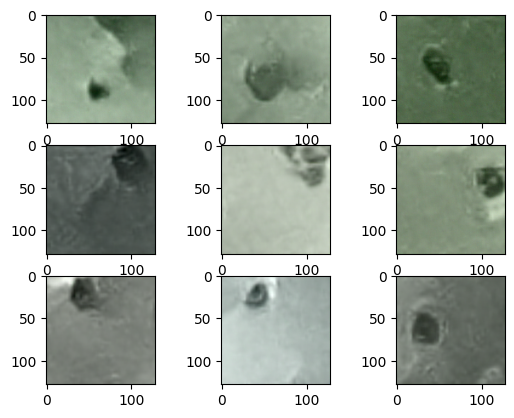

 57%|█████▋    | 401/700 [27:57<4:08:34, 49.88s/it]

------------------------------


 57%|█████▋    | 402/700 [28:00<2:57:12, 35.68s/it]

------------------------------
Train Loss EPOCH: 402: 0.0027
Train Learning Rate EPOCH: 402: 0.000158600512697475
------------------------------


 58%|█████▊    | 403/700 [28:02<2:07:22, 25.73s/it]

------------------------------
Train Loss EPOCH: 403: 0.0028
Train Learning Rate EPOCH: 403: 0.00015778219072923
------------------------------


 58%|█████▊    | 404/700 [28:05<1:32:38, 18.78s/it]

------------------------------
Train Loss EPOCH: 404: 0.0027
Train Learning Rate EPOCH: 404: 0.00015696363645262106
------------------------------


 58%|█████▊    | 405/700 [28:08<1:08:31, 13.94s/it]

------------------------------
Train Loss EPOCH: 405: 0.0030
Train Learning Rate EPOCH: 405: 0.00015614487430254214
------------------------------


 58%|█████▊    | 406/700 [28:10<51:34, 10.52s/it]  

------------------------------
Train Loss EPOCH: 406: 0.0047
Train Learning Rate EPOCH: 406: 0.00015532592872009244
------------------------------


 58%|█████▊    | 407/700 [28:13<39:41,  8.13s/it]

------------------------------
Train Loss EPOCH: 407: 0.0018
Train Learning Rate EPOCH: 407: 0.00015450682415184684
------------------------------


 58%|█████▊    | 408/700 [28:15<31:24,  6.45s/it]

------------------------------
Train Loss EPOCH: 408: 0.0022
Train Learning Rate EPOCH: 408: 0.0001536875850491261
------------------------------


 58%|█████▊    | 409/700 [28:18<25:36,  5.28s/it]

------------------------------
Train Loss EPOCH: 409: 0.0037
Train Learning Rate EPOCH: 409: 0.0001528682358672671
------------------------------


 59%|█████▊    | 410/700 [28:20<21:42,  4.49s/it]

------------------------------
Train Loss EPOCH: 410: 0.0028
Train Learning Rate EPOCH: 410: 0.00015204880106489262
------------------------------


 59%|█████▊    | 411/700 [28:23<18:53,  3.92s/it]

------------------------------
Train Loss EPOCH: 411: 0.0050
Train Learning Rate EPOCH: 411: 0.00015122930510318147
------------------------------


 59%|█████▉    | 412/700 [28:26<16:51,  3.51s/it]

------------------------------
Train Loss EPOCH: 412: 0.0036
Train Learning Rate EPOCH: 412: 0.000150409772445138
------------------------------


 59%|█████▉    | 413/700 [28:28<15:22,  3.21s/it]

------------------------------
Train Loss EPOCH: 413: 0.0032
Train Learning Rate EPOCH: 413: 0.00014959022755486198
------------------------------


 59%|█████▉    | 414/700 [28:31<14:21,  3.01s/it]

------------------------------
Train Loss EPOCH: 414: 0.0034
Train Learning Rate EPOCH: 414: 0.0001487706948968185
------------------------------


 59%|█████▉    | 415/700 [28:33<13:42,  2.89s/it]

------------------------------
Train Loss EPOCH: 415: 0.0027
Train Learning Rate EPOCH: 415: 0.00014795119893510735
------------------------------


 59%|█████▉    | 416/700 [28:36<13:14,  2.80s/it]

------------------------------
Train Loss EPOCH: 416: 0.0027
Train Learning Rate EPOCH: 416: 0.00014713176413273286
------------------------------


 60%|█████▉    | 417/700 [28:38<12:50,  2.72s/it]

------------------------------
Train Loss EPOCH: 417: 0.0019
Train Learning Rate EPOCH: 417: 0.00014631241495087388
------------------------------


 60%|█████▉    | 418/700 [28:41<12:31,  2.66s/it]

------------------------------
Train Loss EPOCH: 418: 0.0030
Train Learning Rate EPOCH: 418: 0.0001454931758481532
------------------------------


 60%|█████▉    | 419/700 [28:43<12:18,  2.63s/it]

------------------------------
Train Loss EPOCH: 419: 0.0021
Train Learning Rate EPOCH: 419: 0.00014467407127990759
------------------------------


 60%|██████    | 420/700 [28:46<12:11,  2.61s/it]

------------------------------
Train Loss EPOCH: 420: 0.0037
Train Learning Rate EPOCH: 420: 0.00014385512569745784
------------------------------


 60%|██████    | 421/700 [28:49<12:09,  2.61s/it]

------------------------------
Train Loss EPOCH: 421: 0.0028
Train Learning Rate EPOCH: 421: 0.00014303636354737897
------------------------------


 60%|██████    | 422/700 [28:51<12:01,  2.59s/it]

------------------------------
Train Loss EPOCH: 422: 0.0054
Train Learning Rate EPOCH: 422: 0.00014221780927077006
------------------------------


 60%|██████    | 423/700 [28:54<12:00,  2.60s/it]

------------------------------
Train Loss EPOCH: 423: 0.0032
Train Learning Rate EPOCH: 423: 0.00014139948730252494
------------------------------


 61%|██████    | 424/700 [28:56<11:52,  2.58s/it]

------------------------------
Train Loss EPOCH: 424: 0.0022
Train Learning Rate EPOCH: 424: 0.000140581422070603
------------------------------


 61%|██████    | 425/700 [28:59<11:51,  2.59s/it]

------------------------------
Train Loss EPOCH: 425: 0.0039
Train Learning Rate EPOCH: 425: 0.00013976363799529936
------------------------------


 61%|██████    | 426/700 [29:01<11:51,  2.60s/it]

------------------------------
Train Loss EPOCH: 426: 0.0027
Train Learning Rate EPOCH: 426: 0.00013894615948851648
------------------------------


 61%|██████    | 427/700 [29:04<11:43,  2.58s/it]

------------------------------
Train Loss EPOCH: 427: 0.0019
Train Learning Rate EPOCH: 427: 0.00013812901095303507
------------------------------


 61%|██████    | 428/700 [29:07<11:37,  2.57s/it]

------------------------------
Train Loss EPOCH: 428: 0.0042
Train Learning Rate EPOCH: 428: 0.000137312216781786
------------------------------


 61%|██████▏   | 429/700 [29:09<11:34,  2.56s/it]

------------------------------
Train Loss EPOCH: 429: 0.0028
Train Learning Rate EPOCH: 429: 0.00013649580135712168
------------------------------


 61%|██████▏   | 430/700 [29:12<11:55,  2.65s/it]

------------------------------
Train Loss EPOCH: 430: 0.0038
Train Learning Rate EPOCH: 430: 0.00013567978905008846
------------------------------


 62%|██████▏   | 431/700 [29:15<12:54,  2.88s/it]

------------------------------
Train Loss EPOCH: 431: 0.0031
Train Learning Rate EPOCH: 431: 0.0001348642042196993
------------------------------


 62%|██████▏   | 432/700 [29:18<12:23,  2.77s/it]

------------------------------
Train Loss EPOCH: 432: 0.0022
Train Learning Rate EPOCH: 432: 0.00013404907121220631
------------------------------


 62%|██████▏   | 433/700 [29:20<12:01,  2.70s/it]

------------------------------
Train Loss EPOCH: 433: 0.0039
Train Learning Rate EPOCH: 433: 0.00013323441436037412
------------------------------


 62%|██████▏   | 434/700 [29:23<11:56,  2.69s/it]

------------------------------
Train Loss EPOCH: 434: 0.0028
Train Learning Rate EPOCH: 434: 0.0001324202579827534
------------------------------


 62%|██████▏   | 435/700 [29:26<11:44,  2.66s/it]

------------------------------
Train Loss EPOCH: 435: 0.0055
Train Learning Rate EPOCH: 435: 0.00013160662638295526
------------------------------


 62%|██████▏   | 436/700 [29:28<11:38,  2.65s/it]

------------------------------
Train Loss EPOCH: 436: 0.0036
Train Learning Rate EPOCH: 436: 0.0001307935438489253
------------------------------


 62%|██████▏   | 437/700 [29:31<11:26,  2.61s/it]

------------------------------
Train Loss EPOCH: 437: 0.0023
Train Learning Rate EPOCH: 437: 0.00012998103465221885
------------------------------


 63%|██████▎   | 438/700 [29:33<11:20,  2.60s/it]

------------------------------
Train Loss EPOCH: 438: 0.0023
Train Learning Rate EPOCH: 438: 0.00012916912304727655
------------------------------


 63%|██████▎   | 439/700 [29:36<11:13,  2.58s/it]

------------------------------
Train Loss EPOCH: 439: 0.0024
Train Learning Rate EPOCH: 439: 0.00012835783327069998
------------------------------


 63%|██████▎   | 440/700 [29:39<11:10,  2.58s/it]

------------------------------
Train Loss EPOCH: 440: 0.0068
Train Learning Rate EPOCH: 440: 0.0001275471895405284
------------------------------


 63%|██████▎   | 441/700 [29:41<11:13,  2.60s/it]

------------------------------
Train Loss EPOCH: 441: 0.0021
Train Learning Rate EPOCH: 441: 0.00012673721605551569
------------------------------


 63%|██████▎   | 442/700 [29:44<11:06,  2.58s/it]

------------------------------
Train Loss EPOCH: 442: 0.0027
Train Learning Rate EPOCH: 442: 0.00012592793699440824
------------------------------


 63%|██████▎   | 443/700 [29:46<10:59,  2.57s/it]

------------------------------
Train Loss EPOCH: 443: 0.0037
Train Learning Rate EPOCH: 443: 0.00012511937651522281
------------------------------


 63%|██████▎   | 444/700 [29:49<10:57,  2.57s/it]

------------------------------
Train Loss EPOCH: 444: 0.0076
Train Learning Rate EPOCH: 444: 0.0001243115587545256
------------------------------


 64%|██████▎   | 445/700 [29:51<10:55,  2.57s/it]

------------------------------
Train Loss EPOCH: 445: 0.0037
Train Learning Rate EPOCH: 445: 0.0001235045078267119
------------------------------


 64%|██████▎   | 446/700 [29:54<10:57,  2.59s/it]

------------------------------
Train Loss EPOCH: 446: 0.0025
Train Learning Rate EPOCH: 446: 0.00012269824782328576
------------------------------


 64%|██████▍   | 447/700 [29:57<10:51,  2.57s/it]

------------------------------
Train Loss EPOCH: 447: 0.0060
Train Learning Rate EPOCH: 447: 0.00012189280281214126
------------------------------


 64%|██████▍   | 448/700 [29:59<10:46,  2.57s/it]

------------------------------
Train Loss EPOCH: 448: 0.0031
Train Learning Rate EPOCH: 448: 0.00012108819683684406
------------------------------


 64%|██████▍   | 449/700 [30:02<10:53,  2.60s/it]

------------------------------
Train Loss EPOCH: 449: 0.0040
Train Learning Rate EPOCH: 449: 0.0001202844539159133
------------------------------


 64%|██████▍   | 450/700 [30:05<10:58,  2.63s/it]

------------------------------
Train Loss EPOCH: 450: 0.0034
Train Learning Rate EPOCH: 450: 0.00011948159804210495
------------------------------


 64%|██████▍   | 451/700 [30:07<10:54,  2.63s/it]

------------------------------
Train Loss EPOCH: 451: 0.0045
Train Learning Rate EPOCH: 451: 0.00011867965318169541
------------------------------


 65%|██████▍   | 452/700 [30:10<10:47,  2.61s/it]

------------------------------
Train Loss EPOCH: 452: 0.0022
Train Learning Rate EPOCH: 452: 0.00011787864327376632
------------------------------


 65%|██████▍   | 453/700 [30:12<10:39,  2.59s/it]

------------------------------
Train Loss EPOCH: 453: 0.0042
Train Learning Rate EPOCH: 453: 0.00011707859222948962
------------------------------


 65%|██████▍   | 454/700 [30:15<10:34,  2.58s/it]

------------------------------
Train Loss EPOCH: 454: 0.0046
Train Learning Rate EPOCH: 454: 0.00011627952393141402
------------------------------


 65%|██████▌   | 455/700 [30:17<10:31,  2.58s/it]

------------------------------
Train Loss EPOCH: 455: 0.0024
Train Learning Rate EPOCH: 455: 0.00011548146223275205
------------------------------


 65%|██████▌   | 456/700 [30:20<10:34,  2.60s/it]

------------------------------
Train Loss EPOCH: 456: 0.0025
Train Learning Rate EPOCH: 456: 0.00011468443095666784
------------------------------


 65%|██████▌   | 457/700 [30:23<10:26,  2.58s/it]

------------------------------
Train Loss EPOCH: 457: 0.0035
Train Learning Rate EPOCH: 457: 0.00011388845389556617
------------------------------


 65%|██████▌   | 458/700 [30:25<10:22,  2.57s/it]

------------------------------
Train Loss EPOCH: 458: 0.0032
Train Learning Rate EPOCH: 458: 0.00011309355481038205
------------------------------


 66%|██████▌   | 459/700 [30:28<10:18,  2.57s/it]

------------------------------
Train Loss EPOCH: 459: 0.0032
Train Learning Rate EPOCH: 459: 0.00011229975742987173
------------------------------


 66%|██████▌   | 460/700 [30:30<10:14,  2.56s/it]

------------------------------
Train Loss EPOCH: 460: 0.0069
Train Learning Rate EPOCH: 460: 0.00011150708544990398
------------------------------


 66%|██████▌   | 461/700 [30:33<10:31,  2.64s/it]

------------------------------
Train Loss EPOCH: 461: 0.0038
Train Learning Rate EPOCH: 461: 0.0001107155625327529
------------------------------


 66%|██████▌   | 462/700 [30:36<10:23,  2.62s/it]

------------------------------
Train Loss EPOCH: 462: 0.0032
Train Learning Rate EPOCH: 462: 0.00010992521230639184
------------------------------


 66%|██████▌   | 463/700 [30:38<10:15,  2.60s/it]

------------------------------
Train Loss EPOCH: 463: 0.0033
Train Learning Rate EPOCH: 463: 0.00010913605836378754
------------------------------


 66%|██████▋   | 464/700 [30:41<10:09,  2.58s/it]

------------------------------
Train Loss EPOCH: 464: 0.0016
Train Learning Rate EPOCH: 464: 0.0001083481242621963
------------------------------


 66%|██████▋   | 465/700 [30:43<10:05,  2.58s/it]

------------------------------
Train Loss EPOCH: 465: 0.0031
Train Learning Rate EPOCH: 465: 0.00010756143352246047
------------------------------


 67%|██████▋   | 466/700 [30:46<10:29,  2.69s/it]

------------------------------
Train Loss EPOCH: 466: 0.0035
Train Learning Rate EPOCH: 466: 0.00010677600962830672
------------------------------


 67%|██████▋   | 467/700 [30:49<10:49,  2.79s/it]

------------------------------
Train Loss EPOCH: 467: 0.0021
Train Learning Rate EPOCH: 467: 0.00010599187602564444
------------------------------


 67%|██████▋   | 468/700 [30:52<10:30,  2.72s/it]

------------------------------
Train Loss EPOCH: 468: 0.0037
Train Learning Rate EPOCH: 468: 0.00010520905612186631
------------------------------


 67%|██████▋   | 469/700 [30:54<10:15,  2.66s/it]

------------------------------
Train Loss EPOCH: 469: 0.0086
Train Learning Rate EPOCH: 469: 0.00010442757328514949
------------------------------


 67%|██████▋   | 470/700 [30:57<10:14,  2.67s/it]

------------------------------
Train Loss EPOCH: 470: 0.0059
Train Learning Rate EPOCH: 470: 0.0001036474508437579
------------------------------


 67%|██████▋   | 471/700 [31:00<10:08,  2.66s/it]

------------------------------
Train Loss EPOCH: 471: 0.0025
Train Learning Rate EPOCH: 471: 0.00010286871208534584
------------------------------


 67%|██████▋   | 472/700 [31:02<10:00,  2.63s/it]

------------------------------
Train Loss EPOCH: 472: 0.0023
Train Learning Rate EPOCH: 472: 0.00010209138025626298
------------------------------


 68%|██████▊   | 473/700 [31:05<09:56,  2.63s/it]

------------------------------
Train Loss EPOCH: 473: 0.0030
Train Learning Rate EPOCH: 473: 0.00010131547856086043
------------------------------


 68%|██████▊   | 474/700 [31:08<10:01,  2.66s/it]

------------------------------
Train Loss EPOCH: 474: 0.0031
Train Learning Rate EPOCH: 474: 0.0001005410301607978
------------------------------


 68%|██████▊   | 475/700 [31:10<09:51,  2.63s/it]

------------------------------
Train Loss EPOCH: 475: 0.0032
Train Learning Rate EPOCH: 475: 9.976805817435207e-05
------------------------------


 68%|██████▊   | 476/700 [31:13<09:47,  2.62s/it]

------------------------------
Train Loss EPOCH: 476: 0.0026
Train Learning Rate EPOCH: 476: 9.899658567572744e-05
------------------------------


 68%|██████▊   | 477/700 [31:15<09:44,  2.62s/it]

------------------------------
Train Loss EPOCH: 477: 0.0021
Train Learning Rate EPOCH: 477: 9.822663569436635e-05
------------------------------


 68%|██████▊   | 478/700 [31:18<09:38,  2.60s/it]

------------------------------
Train Loss EPOCH: 478: 0.0067
Train Learning Rate EPOCH: 478: 9.745823121426217e-05
------------------------------


 68%|██████▊   | 479/700 [31:20<09:32,  2.59s/it]

------------------------------
Train Loss EPOCH: 479: 0.0032
Train Learning Rate EPOCH: 479: 9.669139517327324e-05
------------------------------


 69%|██████▊   | 480/700 [31:23<09:27,  2.58s/it]

------------------------------
Train Loss EPOCH: 480: 0.0017
Train Learning Rate EPOCH: 480: 9.59261504624378e-05
------------------------------


 69%|██████▊   | 481/700 [31:26<09:54,  2.72s/it]

------------------------------
Train Loss EPOCH: 481: 0.0041
Train Learning Rate EPOCH: 481: 9.51625199252909e-05
------------------------------


 69%|██████▉   | 482/700 [31:29<09:44,  2.68s/it]

------------------------------
Train Loss EPOCH: 482: 0.0019
Train Learning Rate EPOCH: 482: 9.440052635718237e-05
------------------------------


 69%|██████▉   | 483/700 [31:31<09:32,  2.64s/it]

------------------------------
Train Loss EPOCH: 483: 0.0020
Train Learning Rate EPOCH: 483: 9.364019250459663e-05
------------------------------


 69%|██████▉   | 484/700 [31:34<09:25,  2.62s/it]

------------------------------
Train Loss EPOCH: 484: 0.0123
Train Learning Rate EPOCH: 484: 9.288154106447325e-05
------------------------------


 69%|██████▉   | 485/700 [31:36<09:17,  2.59s/it]

------------------------------
Train Loss EPOCH: 485: 0.0019
Train Learning Rate EPOCH: 485: 9.212459468352966e-05
------------------------------


 69%|██████▉   | 486/700 [31:39<09:14,  2.59s/it]

------------------------------
Train Loss EPOCH: 486: 0.0028
Train Learning Rate EPOCH: 486: 9.136937595758524e-05
------------------------------


 70%|██████▉   | 487/700 [31:41<09:12,  2.60s/it]

------------------------------
Train Loss EPOCH: 487: 0.0022
Train Learning Rate EPOCH: 487: 9.061590743088653e-05
------------------------------


 70%|██████▉   | 488/700 [31:44<09:06,  2.58s/it]

------------------------------
Train Loss EPOCH: 488: 0.0084
Train Learning Rate EPOCH: 488: 8.986421159543435e-05
------------------------------


 70%|██████▉   | 489/700 [31:47<09:01,  2.57s/it]

------------------------------
Train Loss EPOCH: 489: 0.0025
Train Learning Rate EPOCH: 489: 8.911431089031245e-05
------------------------------


 70%|███████   | 490/700 [31:49<08:57,  2.56s/it]

------------------------------
Train Loss EPOCH: 490: 0.0022
Train Learning Rate EPOCH: 490: 8.836622770101776e-05
------------------------------


 70%|███████   | 491/700 [31:52<08:55,  2.56s/it]

------------------------------
Train Loss EPOCH: 491: 0.0018
Train Learning Rate EPOCH: 491: 8.761998435879187e-05
------------------------------


 70%|███████   | 492/700 [31:54<08:56,  2.58s/it]

------------------------------
Train Loss EPOCH: 492: 0.0025
Train Learning Rate EPOCH: 492: 8.68756031399546e-05
------------------------------


 70%|███████   | 493/700 [31:57<08:50,  2.56s/it]

------------------------------
Train Loss EPOCH: 493: 0.0021
Train Learning Rate EPOCH: 493: 8.613310626523909e-05
------------------------------


 71%|███████   | 494/700 [31:59<08:47,  2.56s/it]

------------------------------
Train Loss EPOCH: 494: 0.0031
Train Learning Rate EPOCH: 494: 8.539251589912837e-05
------------------------------


 71%|███████   | 495/700 [32:02<08:44,  2.56s/it]

------------------------------
Train Loss EPOCH: 495: 0.0024
Train Learning Rate EPOCH: 495: 8.465385414919363e-05
------------------------------


 71%|███████   | 496/700 [32:04<08:41,  2.56s/it]

------------------------------
Train Loss EPOCH: 496: 0.0020
Train Learning Rate EPOCH: 496: 8.391714306543454e-05
------------------------------


 71%|███████   | 497/700 [32:07<08:44,  2.58s/it]

------------------------------
Train Loss EPOCH: 497: 0.0035
Train Learning Rate EPOCH: 497: 8.318240463962082e-05
------------------------------


 71%|███████   | 498/700 [32:10<08:38,  2.57s/it]

------------------------------
Train Loss EPOCH: 498: 0.0042
Train Learning Rate EPOCH: 498: 8.244966080463589e-05
------------------------------


 71%|███████▏  | 499/700 [32:12<08:34,  2.56s/it]

------------------------------
Train Loss EPOCH: 499: 0.0024
Train Learning Rate EPOCH: 499: 8.171893343382192e-05
------------------------------


 71%|███████▏  | 500/700 [32:15<08:29,  2.55s/it]

------------------------------
Train Loss EPOCH: 500: 0.0044
Train Learning Rate EPOCH: 500: 8.099024434032717e-05
------------------------------


100%|██████████| 4/4 [00:02<00:00,  1.55it/s]

------------------------------
Train Loss EPOCH: 501: 0.0035
Train Learning Rate EPOCH: 501: 8.026361527645473e-05


  0%|          | 0/1000 [00:00<?, ?it/s]

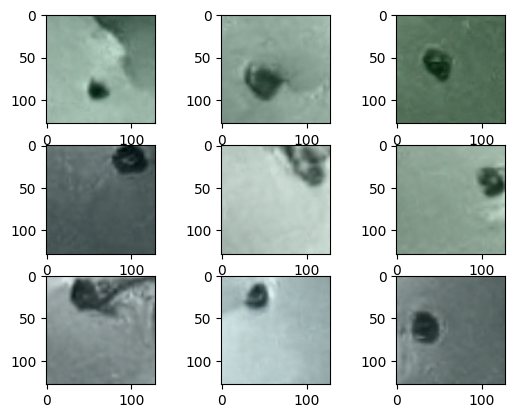

 72%|███████▏  | 501/700 [34:55<2:45:18, 49.84s/it]

------------------------------


 72%|███████▏  | 502/700 [34:57<1:57:39, 35.65s/it]

------------------------------
Train Loss EPOCH: 502: 0.0023
Train Learning Rate EPOCH: 502: 7.953906793301315e-05
------------------------------


 72%|███████▏  | 503/700 [35:00<1:24:26, 25.72s/it]

------------------------------
Train Loss EPOCH: 503: 0.0024
Train Learning Rate EPOCH: 503: 7.881662393866881e-05
------------------------------


 72%|███████▏  | 504/700 [35:03<1:01:19, 18.77s/it]

------------------------------
Train Loss EPOCH: 504: 0.0022
Train Learning Rate EPOCH: 504: 7.80963048593006e-05
------------------------------


 72%|███████▏  | 505/700 [35:05<45:16, 13.93s/it]  

------------------------------
Train Loss EPOCH: 505: 0.0027
Train Learning Rate EPOCH: 505: 7.737813219735598e-05
------------------------------


 72%|███████▏  | 506/700 [35:08<33:59, 10.52s/it]

------------------------------
Train Loss EPOCH: 506: 0.0041
Train Learning Rate EPOCH: 506: 7.666212739120886e-05
------------------------------


 72%|███████▏  | 507/700 [35:10<26:07,  8.12s/it]

------------------------------
Train Loss EPOCH: 507: 0.0015
Train Learning Rate EPOCH: 507: 7.594831181452027e-05
------------------------------


 73%|███████▎  | 508/700 [35:13<20:38,  6.45s/it]

------------------------------
Train Loss EPOCH: 508: 0.0018
Train Learning Rate EPOCH: 508: 7.52367067755996e-05
------------------------------


 73%|███████▎  | 509/700 [35:15<16:49,  5.29s/it]

------------------------------
Train Loss EPOCH: 509: 0.0033
Train Learning Rate EPOCH: 509: 7.4527333516769e-05
------------------------------


 73%|███████▎  | 510/700 [35:18<14:13,  4.49s/it]

------------------------------
Train Loss EPOCH: 510: 0.0025
Train Learning Rate EPOCH: 510: 7.382021321372908e-05
------------------------------


 73%|███████▎  | 511/700 [35:21<12:22,  3.93s/it]

------------------------------
Train Loss EPOCH: 511: 0.0044
Train Learning Rate EPOCH: 511: 7.311536697492695e-05
------------------------------


 73%|███████▎  | 512/700 [35:23<11:01,  3.52s/it]

------------------------------
Train Loss EPOCH: 512: 0.0031
Train Learning Rate EPOCH: 512: 7.241281584092574e-05
------------------------------


 73%|███████▎  | 513/700 [35:26<10:02,  3.22s/it]

------------------------------
Train Loss EPOCH: 513: 0.0028
Train Learning Rate EPOCH: 513: 7.1712580783777e-05
------------------------------


 73%|███████▎  | 514/700 [35:28<09:22,  3.03s/it]

------------------------------
Train Loss EPOCH: 514: 0.0030
Train Learning Rate EPOCH: 514: 7.101468270639433e-05
------------------------------


 74%|███████▎  | 515/700 [35:31<08:59,  2.92s/it]

------------------------------
Train Loss EPOCH: 515: 0.0024
Train Learning Rate EPOCH: 515: 7.031914244192952e-05
------------------------------


 74%|███████▎  | 516/700 [35:34<08:39,  2.82s/it]

------------------------------
Train Loss EPOCH: 516: 0.0024
Train Learning Rate EPOCH: 516: 6.962598075315046e-05
------------------------------


 74%|███████▍  | 517/700 [35:36<08:21,  2.74s/it]

------------------------------
Train Loss EPOCH: 517: 0.0017
Train Learning Rate EPOCH: 517: 6.893521833182186e-05
------------------------------


 74%|███████▍  | 518/700 [35:39<08:07,  2.68s/it]

------------------------------
Train Loss EPOCH: 518: 0.0026
Train Learning Rate EPOCH: 518: 6.824687579808685e-05
------------------------------


 74%|███████▍  | 519/700 [35:41<07:57,  2.64s/it]

------------------------------
Train Loss EPOCH: 519: 0.0018
Train Learning Rate EPOCH: 519: 6.756097369985207e-05
------------------------------


 74%|███████▍  | 520/700 [35:44<07:52,  2.63s/it]

------------------------------
Train Loss EPOCH: 520: 0.0032
Train Learning Rate EPOCH: 520: 6.687753251217379e-05
------------------------------


 74%|███████▍  | 521/700 [35:46<07:48,  2.62s/it]

------------------------------
Train Loss EPOCH: 521: 0.0024
Train Learning Rate EPOCH: 521: 6.619657263664722e-05
------------------------------


 75%|███████▍  | 522/700 [35:49<07:42,  2.60s/it]

------------------------------
Train Loss EPOCH: 522: 0.0047
Train Learning Rate EPOCH: 522: 6.551811440079704e-05
------------------------------


 75%|███████▍  | 523/700 [35:52<07:38,  2.59s/it]

------------------------------
Train Loss EPOCH: 523: 0.0028
Train Learning Rate EPOCH: 523: 6.484217805747087e-05
------------------------------


 75%|███████▍  | 524/700 [35:54<07:33,  2.58s/it]

------------------------------
Train Loss EPOCH: 524: 0.0018
Train Learning Rate EPOCH: 524: 6.416878378423459e-05
------------------------------


 75%|███████▌  | 525/700 [35:57<07:32,  2.59s/it]

------------------------------
Train Loss EPOCH: 525: 0.0035
Train Learning Rate EPOCH: 525: 6.349795168276994e-05
------------------------------


 75%|███████▌  | 526/700 [35:59<07:32,  2.60s/it]

------------------------------
Train Loss EPOCH: 526: 0.0024
Train Learning Rate EPOCH: 526: 6.282970177827472e-05
------------------------------


 75%|███████▌  | 527/700 [36:02<07:26,  2.58s/it]

------------------------------
Train Loss EPOCH: 527: 0.0016
Train Learning Rate EPOCH: 527: 6.216405401886459e-05
------------------------------


 75%|███████▌  | 528/700 [36:04<07:22,  2.57s/it]

------------------------------
Train Loss EPOCH: 528: 0.0037
Train Learning Rate EPOCH: 528: 6.15010282749782e-05
------------------------------


 76%|███████▌  | 529/700 [36:07<07:19,  2.57s/it]

------------------------------
Train Loss EPOCH: 529: 0.0024
Train Learning Rate EPOCH: 529: 6.084064433878333e-05
------------------------------


 76%|███████▌  | 530/700 [36:10<07:19,  2.59s/it]

------------------------------
Train Loss EPOCH: 530: 0.0033
Train Learning Rate EPOCH: 530: 6.018292192358661e-05
------------------------------


 76%|███████▌  | 531/700 [36:12<07:20,  2.61s/it]

------------------------------
Train Loss EPOCH: 531: 0.0026
Train Learning Rate EPOCH: 531: 5.9527880663244845e-05
------------------------------


 76%|███████▌  | 532/700 [36:15<07:15,  2.59s/it]

------------------------------
Train Loss EPOCH: 532: 0.0018
Train Learning Rate EPOCH: 532: 5.88755401115789e-05
------------------------------


 76%|███████▌  | 533/700 [36:17<07:11,  2.58s/it]

------------------------------
Train Loss EPOCH: 533: 0.0034
Train Learning Rate EPOCH: 533: 5.822591974178997e-05
------------------------------


 76%|███████▋  | 534/700 [36:20<07:07,  2.58s/it]

------------------------------
Train Loss EPOCH: 534: 0.0025
Train Learning Rate EPOCH: 534: 5.7579038945878415e-05
------------------------------


 76%|███████▋  | 535/700 [36:23<07:05,  2.58s/it]

------------------------------
Train Loss EPOCH: 535: 0.0049
Train Learning Rate EPOCH: 535: 5.693491703406478e-05
------------------------------


 77%|███████▋  | 536/700 [36:25<07:05,  2.60s/it]

------------------------------
Train Loss EPOCH: 536: 0.0032
Train Learning Rate EPOCH: 536: 5.629357323421347e-05
------------------------------


 77%|███████▋  | 537/700 [36:28<07:01,  2.59s/it]

------------------------------
Train Loss EPOCH: 537: 0.0019
Train Learning Rate EPOCH: 537: 5.565502669125842e-05
------------------------------


 77%|███████▋  | 538/700 [36:30<06:57,  2.57s/it]

------------------------------
Train Loss EPOCH: 538: 0.0020
Train Learning Rate EPOCH: 538: 5.501929646663225e-05
------------------------------


 77%|███████▋  | 539/700 [36:33<06:53,  2.57s/it]

------------------------------
Train Loss EPOCH: 539: 0.0022
Train Learning Rate EPOCH: 539: 5.4386401537696536e-05
------------------------------


 77%|███████▋  | 540/700 [36:35<06:51,  2.57s/it]

------------------------------
Train Loss EPOCH: 540: 0.0060
Train Learning Rate EPOCH: 540: 5.375636079717583e-05
------------------------------


 77%|███████▋  | 541/700 [36:38<06:52,  2.59s/it]

------------------------------
Train Loss EPOCH: 541: 0.0018
Train Learning Rate EPOCH: 541: 5.312919305259346e-05
------------------------------


 77%|███████▋  | 542/700 [36:41<06:47,  2.58s/it]

------------------------------
Train Loss EPOCH: 542: 0.0022
Train Learning Rate EPOCH: 542: 5.2504917025710085e-05
------------------------------


 78%|███████▊  | 543/700 [36:43<06:43,  2.57s/it]

------------------------------
Train Loss EPOCH: 543: 0.0027
Train Learning Rate EPOCH: 543: 5.188355135196496e-05
------------------------------


 78%|███████▊  | 544/700 [36:46<06:39,  2.56s/it]

------------------------------
Train Loss EPOCH: 544: 0.0065
Train Learning Rate EPOCH: 544: 5.1265114579919545e-05
------------------------------


 78%|███████▊  | 545/700 [36:48<06:37,  2.57s/it]

------------------------------
Train Loss EPOCH: 545: 0.0030
Train Learning Rate EPOCH: 545: 5.064962517070388e-05
------------------------------


 78%|███████▊  | 546/700 [36:51<06:37,  2.58s/it]

------------------------------
Train Loss EPOCH: 546: 0.0020
Train Learning Rate EPOCH: 546: 5.0037101497465294e-05
------------------------------


 78%|███████▊  | 547/700 [36:53<06:33,  2.57s/it]

------------------------------
Train Loss EPOCH: 547: 0.0043
Train Learning Rate EPOCH: 547: 4.942756184482028e-05
------------------------------


 78%|███████▊  | 548/700 [36:56<06:31,  2.58s/it]

------------------------------
Train Loss EPOCH: 548: 0.0024
Train Learning Rate EPOCH: 548: 4.8821024408308395e-05
------------------------------


 78%|███████▊  | 549/700 [36:59<06:28,  2.57s/it]

------------------------------
Train Loss EPOCH: 549: 0.0030
Train Learning Rate EPOCH: 549: 4.821750729384927e-05
------------------------------


 79%|███████▊  | 550/700 [37:01<06:25,  2.57s/it]

------------------------------
Train Loss EPOCH: 550: 0.0024
Train Learning Rate EPOCH: 550: 4.761702851720191e-05
------------------------------


 79%|███████▊  | 551/700 [37:04<06:27,  2.60s/it]

------------------------------
Train Loss EPOCH: 551: 0.0036
Train Learning Rate EPOCH: 551: 4.701960600342718e-05
------------------------------


 79%|███████▉  | 552/700 [37:06<06:23,  2.59s/it]

------------------------------
Train Loss EPOCH: 552: 0.0017
Train Learning Rate EPOCH: 552: 4.642525758635253e-05
------------------------------


 79%|███████▉  | 553/700 [37:09<06:19,  2.58s/it]

------------------------------
Train Loss EPOCH: 553: 0.0034
Train Learning Rate EPOCH: 553: 4.583400100803977e-05
------------------------------


 79%|███████▉  | 554/700 [37:11<06:15,  2.57s/it]

------------------------------
Train Loss EPOCH: 554: 0.0039
Train Learning Rate EPOCH: 554: 4.5245853918255114e-05
------------------------------


 79%|███████▉  | 555/700 [37:14<06:12,  2.57s/it]

------------------------------
Train Loss EPOCH: 555: 0.0020
Train Learning Rate EPOCH: 555: 4.4660833873942935e-05
------------------------------


 79%|███████▉  | 556/700 [37:17<06:13,  2.59s/it]

------------------------------
Train Loss EPOCH: 556: 0.0021
Train Learning Rate EPOCH: 556: 4.407895833870094e-05
------------------------------


 80%|███████▉  | 557/700 [37:19<06:10,  2.59s/it]

------------------------------
Train Loss EPOCH: 557: 0.0029
Train Learning Rate EPOCH: 557: 4.350024468225945e-05
------------------------------


 80%|███████▉  | 558/700 [37:22<06:06,  2.58s/it]

------------------------------
Train Loss EPOCH: 558: 0.0027
Train Learning Rate EPOCH: 558: 4.292471017996244e-05
------------------------------


 80%|███████▉  | 559/700 [37:24<06:02,  2.57s/it]

------------------------------
Train Loss EPOCH: 559: 0.0027
Train Learning Rate EPOCH: 559: 4.235237201225236e-05
------------------------------


 80%|████████  | 560/700 [37:27<05:59,  2.57s/it]

------------------------------
Train Loss EPOCH: 560: 0.0059
Train Learning Rate EPOCH: 560: 4.178324726415664e-05
------------------------------


 80%|████████  | 561/700 [37:30<06:01,  2.60s/it]

------------------------------
Train Loss EPOCH: 561: 0.0033
Train Learning Rate EPOCH: 561: 4.121735292477825e-05
------------------------------


 80%|████████  | 562/700 [37:32<05:58,  2.60s/it]

------------------------------
Train Loss EPOCH: 562: 0.0026
Train Learning Rate EPOCH: 562: 4.06547058867883e-05
------------------------------


 80%|████████  | 563/700 [37:35<05:54,  2.59s/it]

------------------------------
Train Loss EPOCH: 563: 0.0029
Train Learning Rate EPOCH: 563: 4.0095322945921614e-05
------------------------------


 81%|████████  | 564/700 [37:37<05:50,  2.58s/it]

------------------------------
Train Loss EPOCH: 564: 0.0013
Train Learning Rate EPOCH: 564: 3.953922080047575e-05
------------------------------


 81%|████████  | 565/700 [37:40<05:47,  2.57s/it]

------------------------------
Train Loss EPOCH: 565: 0.0026
Train Learning Rate EPOCH: 565: 3.8986416050812206e-05
------------------------------


 81%|████████  | 566/700 [37:42<05:45,  2.58s/it]

------------------------------
Train Loss EPOCH: 566: 0.0030
Train Learning Rate EPOCH: 566: 3.8436925198861076e-05
------------------------------


 81%|████████  | 567/700 [37:45<05:43,  2.58s/it]

------------------------------
Train Loss EPOCH: 567: 0.0017
Train Learning Rate EPOCH: 567: 3.78907646476282e-05
------------------------------


 81%|████████  | 568/700 [37:48<05:39,  2.57s/it]

------------------------------
Train Loss EPOCH: 568: 0.0032
Train Learning Rate EPOCH: 568: 3.734795070070582e-05
------------------------------


 81%|████████▏ | 569/700 [37:50<05:35,  2.56s/it]

------------------------------
Train Loss EPOCH: 569: 0.0074
Train Learning Rate EPOCH: 569: 3.6808499561785734e-05
------------------------------


 81%|████████▏ | 570/700 [37:53<05:32,  2.56s/it]

------------------------------
Train Loss EPOCH: 570: 0.0038
Train Learning Rate EPOCH: 570: 3.627242733417561e-05
------------------------------


 82%|████████▏ | 571/700 [37:55<05:31,  2.57s/it]

------------------------------
Train Loss EPOCH: 571: 0.0019
Train Learning Rate EPOCH: 571: 3.5739750020318135e-05
------------------------------


 82%|████████▏ | 572/700 [37:58<05:31,  2.59s/it]

------------------------------
Train Loss EPOCH: 572: 0.0017
Train Learning Rate EPOCH: 572: 3.5210483521313784e-05
------------------------------


 82%|████████▏ | 573/700 [38:01<05:27,  2.58s/it]

------------------------------
Train Loss EPOCH: 573: 0.0023
Train Learning Rate EPOCH: 573: 3.468464363644551e-05
------------------------------


 82%|████████▏ | 574/700 [38:03<05:24,  2.57s/it]

------------------------------
Train Loss EPOCH: 574: 0.0023
Train Learning Rate EPOCH: 574: 3.4162246062707654e-05
------------------------------


 82%|████████▏ | 575/700 [38:06<05:21,  2.57s/it]

------------------------------
Train Loss EPOCH: 575: 0.0026
Train Learning Rate EPOCH: 575: 3.364330639433701e-05
------------------------------


 82%|████████▏ | 576/700 [38:08<05:18,  2.57s/it]

------------------------------
Train Loss EPOCH: 576: 0.0020
Train Learning Rate EPOCH: 576: 3.312784012234768e-05
------------------------------


 82%|████████▏ | 577/700 [38:11<05:18,  2.59s/it]

------------------------------
Train Loss EPOCH: 577: 0.0017
Train Learning Rate EPOCH: 577: 3.261586263406819e-05
------------------------------


 83%|████████▎ | 578/700 [38:13<05:14,  2.58s/it]

------------------------------
Train Loss EPOCH: 578: 0.0051
Train Learning Rate EPOCH: 578: 3.2107389212682574e-05
------------------------------


 83%|████████▎ | 579/700 [38:16<05:11,  2.57s/it]

------------------------------
Train Loss EPOCH: 579: 0.0027
Train Learning Rate EPOCH: 579: 3.1602435036773885e-05
------------------------------


 83%|████████▎ | 580/700 [38:18<05:07,  2.56s/it]

------------------------------
Train Loss EPOCH: 580: 0.0014
Train Learning Rate EPOCH: 580: 3.110101517987129e-05
------------------------------


 83%|████████▎ | 581/700 [38:21<05:05,  2.57s/it]

------------------------------
Train Loss EPOCH: 581: 0.0032
Train Learning Rate EPOCH: 581: 3.0603144609999836e-05
------------------------------


 83%|████████▎ | 582/700 [38:24<05:05,  2.59s/it]

------------------------------
Train Loss EPOCH: 582: 0.0016
Train Learning Rate EPOCH: 582: 3.0108838189233987e-05
------------------------------


 83%|████████▎ | 583/700 [38:26<05:00,  2.57s/it]

------------------------------
Train Loss EPOCH: 583: 0.0016
Train Learning Rate EPOCH: 583: 2.9618110673253714e-05
------------------------------


 83%|████████▎ | 584/700 [38:29<04:57,  2.57s/it]

------------------------------
Train Loss EPOCH: 584: 0.0101
Train Learning Rate EPOCH: 584: 2.913097671090404e-05
------------------------------


 84%|████████▎ | 585/700 [38:31<04:54,  2.56s/it]

------------------------------
Train Loss EPOCH: 585: 0.0014
Train Learning Rate EPOCH: 585: 2.8647450843757897e-05
------------------------------


 84%|████████▎ | 586/700 [38:34<04:51,  2.56s/it]

------------------------------
Train Loss EPOCH: 586: 0.0019
Train Learning Rate EPOCH: 586: 2.8167547505681898e-05
------------------------------


 84%|████████▍ | 587/700 [38:37<04:51,  2.58s/it]

------------------------------
Train Loss EPOCH: 587: 0.0015
Train Learning Rate EPOCH: 587: 2.76912810224056e-05
------------------------------


 84%|████████▍ | 588/700 [38:39<04:48,  2.57s/it]

------------------------------
Train Loss EPOCH: 588: 0.0054
Train Learning Rate EPOCH: 588: 2.7218665611093643e-05
------------------------------


 84%|████████▍ | 589/700 [38:42<04:44,  2.56s/it]

------------------------------
Train Loss EPOCH: 589: 0.0018
Train Learning Rate EPOCH: 589: 2.674971537992161e-05
------------------------------


 84%|████████▍ | 590/700 [38:44<04:40,  2.55s/it]

------------------------------
Train Loss EPOCH: 590: 0.0015
Train Learning Rate EPOCH: 590: 2.6284444327654715e-05
------------------------------


 84%|████████▍ | 591/700 [38:47<04:38,  2.56s/it]

------------------------------
Train Loss EPOCH: 591: 0.0014
Train Learning Rate EPOCH: 591: 2.5822866343230036e-05
------------------------------


 85%|████████▍ | 592/700 [38:49<04:38,  2.58s/it]

------------------------------
Train Loss EPOCH: 592: 0.0019
Train Learning Rate EPOCH: 592: 2.536499520534165e-05
------------------------------


 85%|████████▍ | 593/700 [38:52<04:34,  2.57s/it]

------------------------------
Train Loss EPOCH: 593: 0.0016
Train Learning Rate EPOCH: 593: 2.49108445820298e-05
------------------------------


 85%|████████▍ | 594/700 [38:54<04:31,  2.56s/it]

------------------------------
Train Loss EPOCH: 594: 0.0024
Train Learning Rate EPOCH: 594: 2.446042803027236e-05
------------------------------


 85%|████████▌ | 595/700 [38:57<04:28,  2.56s/it]

------------------------------
Train Loss EPOCH: 595: 0.0019
Train Learning Rate EPOCH: 595: 2.4013758995580522e-05
------------------------------


 85%|████████▌ | 596/700 [39:00<04:26,  2.56s/it]

------------------------------
Train Loss EPOCH: 596: 0.0015
Train Learning Rate EPOCH: 596: 2.3570850811597224e-05
------------------------------


 85%|████████▌ | 597/700 [39:02<04:26,  2.58s/it]

------------------------------
Train Loss EPOCH: 597: 0.0028
Train Learning Rate EPOCH: 597: 2.313171669969924e-05
------------------------------


 85%|████████▌ | 598/700 [39:05<04:23,  2.58s/it]

------------------------------
Train Loss EPOCH: 598: 0.0034
Train Learning Rate EPOCH: 598: 2.2696369768602406e-05
------------------------------


 86%|████████▌ | 599/700 [39:07<04:19,  2.57s/it]

------------------------------
Train Loss EPOCH: 599: 0.0019
Train Learning Rate EPOCH: 599: 2.226482301397038e-05
------------------------------


 86%|████████▌ | 600/700 [39:10<04:15,  2.56s/it]

------------------------------
Train Loss EPOCH: 600: 0.0038
Train Learning Rate EPOCH: 600: 2.1837089318026714e-05
------------------------------


100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

------------------------------
Train Loss EPOCH: 601: 0.0030
Train Learning Rate EPOCH: 601: 2.1413181449170247e-05


  0%|          | 0/1000 [00:00<?, ?it/s]

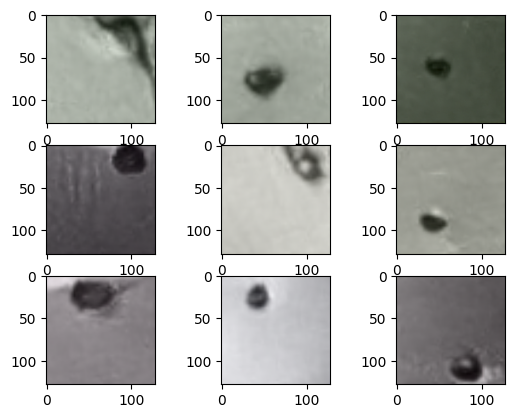

 86%|████████▌ | 601/700 [41:51<1:22:30, 50.01s/it]

------------------------------


 86%|████████▌ | 602/700 [41:53<58:25, 35.77s/it]  

------------------------------
Train Loss EPOCH: 602: 0.0018
Train Learning Rate EPOCH: 602: 2.099311206159396e-05
------------------------------


 86%|████████▌ | 603/700 [41:56<41:42, 25.80s/it]

------------------------------
Train Loss EPOCH: 603: 0.0020
Train Learning Rate EPOCH: 603: 2.0576893694907263e-05
------------------------------


 86%|████████▋ | 604/700 [41:58<30:07, 18.83s/it]

------------------------------
Train Loss EPOCH: 604: 0.0019
Train Learning Rate EPOCH: 604: 2.0164538773761725e-05
------------------------------


 86%|████████▋ | 605/700 [42:01<22:05, 13.95s/it]

------------------------------
Train Loss EPOCH: 605: 0.0022
Train Learning Rate EPOCH: 605: 1.975605960747996e-05
------------------------------


 87%|████████▋ | 606/700 [42:03<16:33, 10.56s/it]

------------------------------
Train Loss EPOCH: 606: 0.0035
Train Learning Rate EPOCH: 606: 1.9351468389688473e-05
------------------------------


 87%|████████▋ | 607/700 [42:06<12:39,  8.16s/it]

------------------------------
Train Loss EPOCH: 607: 0.0012
Train Learning Rate EPOCH: 607: 1.8950777197953503e-05
------------------------------


 87%|████████▋ | 608/700 [42:09<09:56,  6.48s/it]

------------------------------
Train Loss EPOCH: 608: 0.0014
Train Learning Rate EPOCH: 608: 1.8553997993420495e-05
------------------------------


 87%|████████▋ | 609/700 [42:11<08:02,  5.30s/it]

------------------------------
Train Loss EPOCH: 609: 0.0028
Train Learning Rate EPOCH: 609: 1.8161142620456963e-05
------------------------------


 87%|████████▋ | 610/700 [42:14<06:43,  4.48s/it]

------------------------------
Train Loss EPOCH: 610: 0.0021
Train Learning Rate EPOCH: 610: 1.7772222806299264e-05
------------------------------


 87%|████████▋ | 611/700 [42:16<05:48,  3.92s/it]

------------------------------
Train Loss EPOCH: 611: 0.0037
Train Learning Rate EPOCH: 611: 1.7387250160702047e-05
------------------------------


 87%|████████▋ | 612/700 [42:19<05:09,  3.51s/it]

------------------------------
Train Loss EPOCH: 612: 0.0025
Train Learning Rate EPOCH: 612: 1.7006236175592046e-05
------------------------------


 88%|████████▊ | 613/700 [42:21<04:40,  3.22s/it]

------------------------------
Train Loss EPOCH: 613: 0.0023
Train Learning Rate EPOCH: 613: 1.6629192224724812e-05
------------------------------


 88%|████████▊ | 614/700 [42:24<04:20,  3.02s/it]

------------------------------
Train Loss EPOCH: 614: 0.0024
Train Learning Rate EPOCH: 614: 1.6256129563345466e-05
------------------------------


 88%|████████▊ | 615/700 [42:27<04:05,  2.89s/it]

------------------------------
Train Loss EPOCH: 615: 0.0020
Train Learning Rate EPOCH: 615: 1.5887059327852325e-05
------------------------------


 88%|████████▊ | 616/700 [42:29<03:56,  2.81s/it]

------------------------------
Train Loss EPOCH: 616: 0.0020
Train Learning Rate EPOCH: 616: 1.5521992535464796e-05
------------------------------


 88%|████████▊ | 617/700 [42:32<03:47,  2.74s/it]

------------------------------
Train Loss EPOCH: 617: 0.0013
Train Learning Rate EPOCH: 617: 1.5160940083894373e-05
------------------------------


 88%|████████▊ | 618/700 [42:34<03:40,  2.68s/it]

------------------------------
Train Loss EPOCH: 618: 0.0023
Train Learning Rate EPOCH: 618: 1.4803912751019354e-05
------------------------------


 88%|████████▊ | 619/700 [42:37<03:34,  2.64s/it]

------------------------------
Train Loss EPOCH: 619: 0.0015
Train Learning Rate EPOCH: 619: 1.445092119456297e-05
------------------------------


 89%|████████▊ | 620/700 [42:39<03:29,  2.62s/it]

------------------------------
Train Loss EPOCH: 620: 0.0027
Train Learning Rate EPOCH: 620: 1.410197595177548e-05
------------------------------


 89%|████████▊ | 621/700 [42:42<03:27,  2.63s/it]

------------------------------
Train Loss EPOCH: 621: 0.0020
Train Learning Rate EPOCH: 621: 1.375708743911944e-05
------------------------------


 89%|████████▉ | 622/700 [42:45<03:24,  2.62s/it]

------------------------------
Train Loss EPOCH: 622: 0.0038
Train Learning Rate EPOCH: 622: 1.3416265951958865e-05
------------------------------


 89%|████████▉ | 623/700 [42:47<03:20,  2.60s/it]

------------------------------
Train Loss EPOCH: 623: 0.0022
Train Learning Rate EPOCH: 623: 1.3079521664251763e-05
------------------------------


 89%|████████▉ | 624/700 [42:50<03:16,  2.59s/it]

------------------------------
Train Loss EPOCH: 624: 0.0015
Train Learning Rate EPOCH: 624: 1.2746864628246583e-05
------------------------------


 89%|████████▉ | 625/700 [42:52<03:13,  2.58s/it]

------------------------------
Train Loss EPOCH: 625: 0.0030
Train Learning Rate EPOCH: 625: 1.2418304774182075e-05
------------------------------


 89%|████████▉ | 626/700 [42:55<03:11,  2.59s/it]

------------------------------
Train Loss EPOCH: 626: 0.0020
Train Learning Rate EPOCH: 626: 1.2093851909990754e-05
------------------------------


 90%|████████▉ | 627/700 [42:58<03:09,  2.60s/it]

------------------------------
Train Loss EPOCH: 627: 0.0013
Train Learning Rate EPOCH: 627: 1.1773515721006404e-05
------------------------------


 90%|████████▉ | 628/700 [43:00<03:06,  2.58s/it]

------------------------------
Train Loss EPOCH: 628: 0.0032
Train Learning Rate EPOCH: 628: 1.145730576967463e-05
------------------------------


 90%|████████▉ | 629/700 [43:03<03:02,  2.57s/it]

------------------------------
Train Loss EPOCH: 629: 0.0020
Train Learning Rate EPOCH: 629: 1.114523149526766e-05
------------------------------


 90%|█████████ | 630/700 [43:05<02:59,  2.56s/it]

------------------------------
Train Loss EPOCH: 630: 0.0029
Train Learning Rate EPOCH: 630: 1.0837302213602311e-05
------------------------------


 90%|█████████ | 631/700 [43:08<02:57,  2.58s/it]

------------------------------
Train Loss EPOCH: 631: 0.0022
Train Learning Rate EPOCH: 631: 1.0533527116762296e-05
------------------------------


 90%|█████████ | 632/700 [43:10<02:55,  2.58s/it]

------------------------------
Train Loss EPOCH: 632: 0.0014
Train Learning Rate EPOCH: 632: 1.0233915272823373e-05
------------------------------


 90%|█████████ | 633/700 [43:13<02:52,  2.57s/it]

------------------------------
Train Loss EPOCH: 633: 0.0028
Train Learning Rate EPOCH: 633: 9.938475625582942e-06
------------------------------


 91%|█████████ | 634/700 [43:15<02:49,  2.56s/it]

------------------------------
Train Loss EPOCH: 634: 0.0022
Train Learning Rate EPOCH: 634: 9.647216994293034e-06
------------------------------


 91%|█████████ | 635/700 [43:18<02:46,  2.56s/it]

------------------------------
Train Loss EPOCH: 635: 0.0042
Train Learning Rate EPOCH: 635: 9.360148073396962e-06
------------------------------


 91%|█████████ | 636/700 [43:21<02:44,  2.57s/it]

------------------------------
Train Loss EPOCH: 636: 0.0027
Train Learning Rate EPOCH: 636: 9.077277432269769e-06
------------------------------


 91%|█████████ | 637/700 [43:23<02:43,  2.59s/it]

------------------------------
Train Loss EPOCH: 637: 0.0016
Train Learning Rate EPOCH: 637: 8.798613514962516e-06
------------------------------


 91%|█████████ | 638/700 [43:26<02:40,  2.58s/it]

------------------------------
Train Loss EPOCH: 638: 0.0017
Train Learning Rate EPOCH: 638: 8.524164639950177e-06
------------------------------


 91%|█████████▏| 639/700 [43:28<02:36,  2.57s/it]

------------------------------
Train Loss EPOCH: 639: 0.0019
Train Learning Rate EPOCH: 639: 8.253938999883308e-06
------------------------------


 91%|█████████▏| 640/700 [43:31<02:33,  2.57s/it]

------------------------------
Train Loss EPOCH: 640: 0.0052
Train Learning Rate EPOCH: 640: 7.987944661343432e-06
------------------------------


 92%|█████████▏| 641/700 [43:33<02:31,  2.57s/it]

------------------------------
Train Loss EPOCH: 641: 0.0015
Train Learning Rate EPOCH: 641: 7.726189564602404e-06
------------------------------


 92%|█████████▏| 642/700 [43:36<02:29,  2.57s/it]

------------------------------
Train Loss EPOCH: 642: 0.0019
Train Learning Rate EPOCH: 642: 7.468681523385206e-06
------------------------------


 92%|█████████▏| 643/700 [43:39<02:25,  2.56s/it]

------------------------------
Train Loss EPOCH: 643: 0.0023
Train Learning Rate EPOCH: 643: 7.215428224636771e-06
------------------------------


 92%|█████████▏| 644/700 [43:41<02:23,  2.56s/it]

------------------------------
Train Loss EPOCH: 644: 0.0055
Train Learning Rate EPOCH: 644: 6.966437228292543e-06
------------------------------


 92%|█████████▏| 645/700 [43:44<02:20,  2.56s/it]

------------------------------
Train Loss EPOCH: 645: 0.0025
Train Learning Rate EPOCH: 645: 6.721715967052793e-06
------------------------------


 92%|█████████▏| 646/700 [43:46<02:18,  2.56s/it]

------------------------------
Train Loss EPOCH: 646: 0.0016
Train Learning Rate EPOCH: 646: 6.481271746160699e-06
------------------------------


 92%|█████████▏| 647/700 [43:49<02:16,  2.58s/it]

------------------------------
Train Loss EPOCH: 647: 0.0037
Train Learning Rate EPOCH: 647: 6.2451117431842835e-06
------------------------------


 93%|█████████▎| 648/700 [43:51<02:13,  2.57s/it]

------------------------------
Train Loss EPOCH: 648: 0.0019
Train Learning Rate EPOCH: 648: 6.013243007802254e-06
------------------------------


 93%|█████████▎| 649/700 [43:54<02:10,  2.56s/it]

------------------------------
Train Loss EPOCH: 649: 0.0024
Train Learning Rate EPOCH: 649: 5.7856724615934045e-06
------------------------------


 93%|█████████▎| 650/700 [43:57<02:07,  2.55s/it]

------------------------------
Train Loss EPOCH: 650: 0.0020
Train Learning Rate EPOCH: 650: 5.56240689783013e-06
------------------------------


 93%|█████████▎| 651/700 [43:59<02:05,  2.56s/it]

------------------------------
Train Loss EPOCH: 651: 0.0030
Train Learning Rate EPOCH: 651: 5.343452981275487e-06
------------------------------


 93%|█████████▎| 652/700 [44:02<02:03,  2.57s/it]

------------------------------
Train Loss EPOCH: 652: 0.0014
Train Learning Rate EPOCH: 652: 5.128817247984507e-06
------------------------------


 93%|█████████▎| 653/700 [44:04<02:00,  2.56s/it]

------------------------------
Train Loss EPOCH: 653: 0.0030
Train Learning Rate EPOCH: 653: 4.918506105108766e-06
------------------------------


 93%|█████████▎| 654/700 [44:07<01:57,  2.56s/it]

------------------------------
Train Loss EPOCH: 654: 0.0032
Train Learning Rate EPOCH: 654: 4.712525830705338e-06
------------------------------


 94%|█████████▎| 655/700 [44:09<01:54,  2.55s/it]

------------------------------
Train Loss EPOCH: 655: 0.0016
Train Learning Rate EPOCH: 655: 4.510882573549312e-06
------------------------------


 94%|█████████▎| 656/700 [44:12<01:52,  2.56s/it]

------------------------------
Train Loss EPOCH: 656: 0.0018
Train Learning Rate EPOCH: 656: 4.31358235295029e-06
------------------------------


 94%|█████████▍| 657/700 [44:14<01:50,  2.57s/it]

------------------------------
Train Loss EPOCH: 657: 0.0025
Train Learning Rate EPOCH: 657: 4.12063105857261e-06
------------------------------


 94%|█████████▍| 658/700 [44:17<01:48,  2.57s/it]

------------------------------
Train Loss EPOCH: 658: 0.0021
Train Learning Rate EPOCH: 658: 3.932034450259625e-06
------------------------------


 94%|█████████▍| 659/700 [44:20<01:45,  2.57s/it]

------------------------------
Train Loss EPOCH: 659: 0.0024
Train Learning Rate EPOCH: 659: 3.7477981578617365e-06
------------------------------


 94%|█████████▍| 660/700 [44:22<01:42,  2.56s/it]

------------------------------
Train Loss EPOCH: 660: 0.0050
Train Learning Rate EPOCH: 660: 3.5679276810683167e-06
------------------------------


 94%|█████████▍| 661/700 [44:25<01:39,  2.56s/it]

------------------------------
Train Loss EPOCH: 661: 0.0028
Train Learning Rate EPOCH: 661: 3.3924283892435345e-06
------------------------------


 95%|█████████▍| 662/700 [44:27<01:38,  2.58s/it]

------------------------------
Train Loss EPOCH: 662: 0.0021
Train Learning Rate EPOCH: 662: 3.2213055212661043e-06
------------------------------


 95%|█████████▍| 663/700 [44:30<01:35,  2.58s/it]

------------------------------
Train Loss EPOCH: 663: 0.0023
Train Learning Rate EPOCH: 663: 3.0545641853729096e-06
------------------------------


 95%|█████████▍| 664/700 [44:32<01:32,  2.57s/it]

------------------------------
Train Loss EPOCH: 664: 0.0011
Train Learning Rate EPOCH: 664: 2.892209359006409e-06
------------------------------


 95%|█████████▌| 665/700 [44:35<01:29,  2.56s/it]

------------------------------
Train Loss EPOCH: 665: 0.0021
Train Learning Rate EPOCH: 665: 2.73424588866622e-06
------------------------------


 95%|█████████▌| 666/700 [44:38<01:26,  2.56s/it]

------------------------------
Train Loss EPOCH: 666: 0.0027
Train Learning Rate EPOCH: 666: 2.5806784897642875e-06
------------------------------


 95%|█████████▌| 667/700 [44:40<01:25,  2.58s/it]

------------------------------
Train Loss EPOCH: 667: 0.0013
Train Learning Rate EPOCH: 667: 2.4315117464842436e-06
------------------------------


 95%|█████████▌| 668/700 [44:43<01:22,  2.58s/it]

------------------------------
Train Loss EPOCH: 668: 0.0028
Train Learning Rate EPOCH: 668: 2.286750111644453e-06
------------------------------


 96%|█████████▌| 669/700 [44:45<01:19,  2.57s/it]

------------------------------
Train Loss EPOCH: 669: 0.0068
Train Learning Rate EPOCH: 669: 2.1463979065652337e-06
------------------------------


 96%|█████████▌| 670/700 [44:48<01:16,  2.56s/it]

------------------------------
Train Loss EPOCH: 670: 0.0031
Train Learning Rate EPOCH: 670: 2.0104593209397114e-06
------------------------------


 96%|█████████▌| 671/700 [44:50<01:14,  2.56s/it]

------------------------------
Train Loss EPOCH: 671: 0.0016
Train Learning Rate EPOCH: 671: 1.8789384127088026e-06
------------------------------


 96%|█████████▌| 672/700 [44:53<01:12,  2.58s/it]

------------------------------
Train Loss EPOCH: 672: 0.0013
Train Learning Rate EPOCH: 672: 1.7518391079401617e-06
------------------------------


 96%|█████████▌| 673/700 [44:56<01:10,  2.60s/it]

------------------------------
Train Loss EPOCH: 673: 0.0020
Train Learning Rate EPOCH: 673: 1.6291652007108747e-06
------------------------------


 96%|█████████▋| 674/700 [44:58<01:07,  2.59s/it]

------------------------------
Train Loss EPOCH: 674: 0.0020
Train Learning Rate EPOCH: 674: 1.5109203529941993e-06
------------------------------


 96%|█████████▋| 675/700 [45:01<01:04,  2.58s/it]

------------------------------
Train Loss EPOCH: 675: 0.0022
Train Learning Rate EPOCH: 675: 1.3971080945503866e-06
------------------------------


 97%|█████████▋| 676/700 [45:03<01:01,  2.57s/it]

------------------------------
Train Loss EPOCH: 676: 0.0017
Train Learning Rate EPOCH: 676: 1.2877318228211474e-06
------------------------------


 97%|█████████▋| 677/700 [45:06<00:59,  2.58s/it]

------------------------------
Train Loss EPOCH: 677: 0.0015
Train Learning Rate EPOCH: 677: 1.1827948028283352e-06
------------------------------


 97%|█████████▋| 678/700 [45:09<00:56,  2.59s/it]

------------------------------
Train Loss EPOCH: 678: 0.0045
Train Learning Rate EPOCH: 678: 1.082300167076422e-06
------------------------------


 97%|█████████▋| 679/700 [45:11<00:54,  2.57s/it]

------------------------------
Train Loss EPOCH: 679: 0.0024
Train Learning Rate EPOCH: 679: 9.86250915459058e-07
------------------------------


 97%|█████████▋| 680/700 [45:14<00:51,  2.56s/it]

------------------------------
Train Loss EPOCH: 680: 0.0011
Train Learning Rate EPOCH: 680: 8.946499151694597e-07
------------------------------


 97%|█████████▋| 681/700 [45:16<00:48,  2.56s/it]

------------------------------
Train Loss EPOCH: 681: 0.0027
Train Learning Rate EPOCH: 681: 8.074999006148441e-07
------------------------------


 97%|█████████▋| 682/700 [45:19<00:46,  2.59s/it]

------------------------------
Train Loss EPOCH: 682: 0.0013
Train Learning Rate EPOCH: 682: 7.248034733347952e-07
------------------------------


 98%|█████████▊| 683/700 [45:21<00:44,  2.60s/it]

------------------------------
Train Loss EPOCH: 683: 0.0013
Train Learning Rate EPOCH: 683: 6.465631019236417e-07
------------------------------


 98%|█████████▊| 684/700 [45:24<00:41,  2.59s/it]

------------------------------
Train Loss EPOCH: 684: 0.0087
Train Learning Rate EPOCH: 684: 5.727811219566835e-07
------------------------------


 98%|█████████▊| 685/700 [45:27<00:38,  2.58s/it]

------------------------------
Train Loss EPOCH: 685: 0.0012
Train Learning Rate EPOCH: 685: 5.034597359205639e-07
------------------------------


 98%|█████████▊| 686/700 [45:29<00:35,  2.57s/it]

------------------------------
Train Loss EPOCH: 686: 0.0016
Train Learning Rate EPOCH: 686: 4.386010131474882e-07
------------------------------


 98%|█████████▊| 687/700 [45:32<00:33,  2.57s/it]

------------------------------
Train Loss EPOCH: 687: 0.0012
Train Learning Rate EPOCH: 687: 3.782068897534074e-07
------------------------------


 98%|█████████▊| 688/700 [45:34<00:30,  2.58s/it]

------------------------------
Train Loss EPOCH: 688: 0.0045
Train Learning Rate EPOCH: 688: 3.2227916858029724e-07
------------------------------


 98%|█████████▊| 689/700 [45:37<00:28,  2.57s/it]

------------------------------
Train Loss EPOCH: 689: 0.0015
Train Learning Rate EPOCH: 689: 2.7081951914226796e-07
------------------------------


 99%|█████████▊| 690/700 [45:39<00:25,  2.57s/it]

------------------------------
Train Loss EPOCH: 690: 0.0013
Train Learning Rate EPOCH: 690: 2.2382947757580428e-07
------------------------------


 99%|█████████▊| 691/700 [45:42<00:23,  2.56s/it]

------------------------------
Train Loss EPOCH: 691: 0.0012
Train Learning Rate EPOCH: 691: 1.8131044659385197e-07
------------------------------


 99%|█████████▉| 692/700 [45:45<00:20,  2.56s/it]

------------------------------
Train Loss EPOCH: 692: 0.0017
Train Learning Rate EPOCH: 692: 1.4326369544395144e-07
------------------------------


 99%|█████████▉| 693/700 [45:47<00:17,  2.57s/it]

------------------------------
Train Loss EPOCH: 693: 0.0014
Train Learning Rate EPOCH: 693: 1.0969035987036801e-07
------------------------------


 99%|█████████▉| 694/700 [45:50<00:15,  2.57s/it]

------------------------------
Train Loss EPOCH: 694: 0.0020
Train Learning Rate EPOCH: 694: 8.059144208020229e-08
------------------------------


 99%|█████████▉| 695/700 [45:52<00:12,  2.56s/it]

------------------------------
Train Loss EPOCH: 695: 0.0017
Train Learning Rate EPOCH: 695: 5.596781071339762e-08
------------------------------


 99%|█████████▉| 696/700 [45:55<00:10,  2.56s/it]

------------------------------
Train Loss EPOCH: 696: 0.0013
Train Learning Rate EPOCH: 696: 3.5820200816943925e-08
------------------------------


100%|█████████▉| 697/700 [45:57<00:07,  2.57s/it]

------------------------------
Train Loss EPOCH: 697: 0.0025
Train Learning Rate EPOCH: 697: 2.0149213822778787e-08
------------------------------


100%|█████████▉| 698/700 [46:00<00:05,  2.60s/it]

------------------------------
Train Loss EPOCH: 698: 0.0029
Train Learning Rate EPOCH: 698: 8.955317529935058e-09
------------------------------


100%|█████████▉| 699/700 [46:03<00:02,  2.59s/it]

------------------------------
Train Loss EPOCH: 699: 0.0017
Train Learning Rate EPOCH: 699: 2.2388460905853334e-09
------------------------------


100%|██████████| 700/700 [46:05<00:00,  3.95s/it]

------------------------------
Train Loss EPOCH: 700: 0.0036
Train Learning Rate EPOCH: 700: 0.0
------------------------------
Training Time: 2765.72s


In [ ]:
optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)

lr_scheduler = get_cosine_schedule_with_warmup(
    optimizer=optimizer,
    num_warmup_steps=500,
    num_training_steps=len(train_dataloader)*NUM_EPOCHS
)

accelerator = Accelerator(
    mixed_precision=MIXED_PRECISION,
    gradient_accumulation_steps=GRADIENT_ACCUMULATION_STEPS
)

model, optimizer, train_dataloader, lr_scheduler = accelerator.prepare(model, optimizer, train_dataloader, lr_scheduler)

start = timeit.default_timer()
for epoch in tqdm(range(NUM_EPOCHS), position=0, leave=True):
    model.train()
    train_running_loss = 0
    for idx, batch in enumerate(tqdm(train_dataloader, position=0, leave=True)):
        clean_images = batch["images"].to(device)
        noise = torch.randn(clean_images.shape).to(device)
        last_batch_size = len(clean_images)

        timesteps = torch.randint(0, noise_scheduler.config.num_train_timesteps, (last_batch_size,)).to(device)
        noisy_images = noise_scheduler.add_noise(clean_images, noise, timesteps)

        with accelerator.accumulate(model):
            noise_pred = model(noisy_images, timesteps, return_dict=False)[0]
            loss = F.mse_loss(noise_pred, noise)
            accelerator.backward(loss)

            accelerator.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            lr_scheduler.step()
            optimizer.zero_grad()

        train_running_loss += loss.item()
    train_loss = train_running_loss / (idx+1)

    train_learning_rate = lr_scheduler.get_last_lr()[0]
    print("-"*30)
    print(f"Train Loss EPOCH: {epoch+1}: {train_loss:.4f}")
    print(f"Train Learning Rate EPOCH: {epoch+1}: {train_learning_rate}")
    if epoch%100 == 0 and epoch != 0:
        sample_image_generation(model, noise_scheduler, NUM_GENERATE_IMAGES, RANDOM_SEED, NUM_TIMESTEPS)
    print("-"*30)

stop = timeit.default_timer()
print(f"Training Time: {stop-start:.2f}s")

  0%|          | 0/1000 [00:00<?, ?it/s]

ValueError: num must be an integer with 1 <= num <= 9, not 10

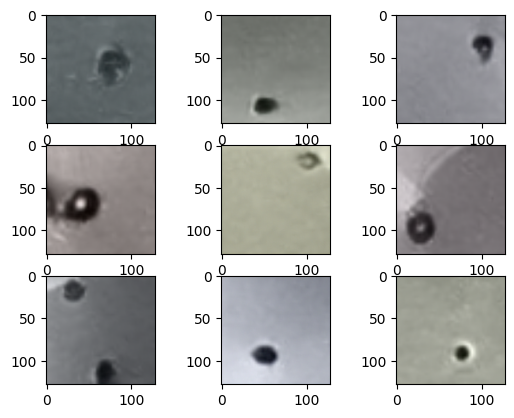

In [ ]:
sample_image_generation(model, noise_scheduler, 10, RANDOM_SEED, NUM_TIMESTEPS)

In [ ]:
import matplotlib.pyplot as plt
def sample_image_generation(model, noise_scheduler, num_generate_images, random_seed, num_timesteps):
    pipeline = DDPMPipeline(unet=accelerator.unwrap_model(model), scheduler=noise_scheduler)

    images = pipeline(
        batch_size=num_generate_images,
        generator=torch.manual_seed(random_seed),
        num_inference_steps=num_timesteps
    ).images

    fig = plt.figure()
    for i in range(1, num_generate_images+1):
        fig.add_subplot(3, 3, i)
        plt.imshow(images[i-1])
        fig, ax = plt.subplots()
        ax.imshow(images[i-1])

        ax.axis('off')

        plt.savefig(f'/content/drive/MyDrive/s/image_{i-1}.png')

        plt.close(fig)
    plt.show()



  0%|          | 0/1000 [00:00<?, ?it/s]

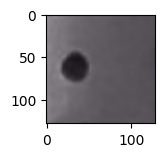

In [ ]:
sample_image_generation(model, noise_scheduler, NUM_GENERATE_IMAGES, RANDOM_SEED, NUM_TIMESTEPS)

In [ ]:
import torch
import torch.nn as nn
class SimpleDiffusionUNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv2d(3, 64, 3, padding=1)
        self.output_conv = nn.Conv2d(64, 3, 1) # Example output layer


    def forward(self, x, t=None):
        # Simplified forward pass for demonstration
        x = self.conv(x)
        x = torch.relu(x)
        return self.output_conv(x)

print("Model initialized (and hypothetically trained).")


model_weights_path = "/content/drive/MyDrive/s/diffusion_model_weights.pth"


torch.save(model, model_weights_path)

print(f"Diffusion model weights saved successfully to: {model_weights_path}")


Model initialized (and hypothetically trained).
Diffusion model weights saved successfully to: /content/drive/MyDrive/s/diffusion_model_weights.pth
